In [99]:
import pandas as pd
import random
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import math
import statistics as stat
from scipy.stats import norm
import numpy as np
import pprint

# ***1-Team Analysis and rating***

In Order to execute this notebook tou should upload the following files :

- gsc_team.xlsx
- all_players_gsc_stats.xlsx
- all_players_wages.xlsx

***Axis6 : Goal Shot Creation***

In [100]:
df = pd.read_excel('/content/gsc_team.xlsx')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Squad,# Pl,90s,SCA,SCA90,SPassLive,SPassDead,STO,SSh,SFld,SDef,GCA,GCA90,GPassLive,GPassDead,GTO,GSh,GFld,GDef
0,Arsenal,26,38.0,1045,27.50,776,78,57,73,43,18,150,3.95,121,6,5,13,3,2
1,Aston Villa,26,38.0,751,19.76,565,50,48,38,40,10,84,2.21,55,2,6,12,6,3
2,Bournemouth,31,38.0,616,16.21,445,45,52,43,24,7,64,1.68,44,5,4,8,2,1
3,Brentford,25,38.0,702,18.47,475,99,32,45,44,7,98,2.58,65,8,4,8,11,2
4,Brighton,29,38.0,1074,28.26,819,73,80,63,27,12,114,3.00,83,3,12,9,6,1
5,Chelsea,32,38.0,859,22.61,667,66,42,42,31,11,68,1.79,57,3,2,2,4,0
6,Crystal Palace,26,38.0,746,19.63,497,67,56,49,59,18,67,1.76,43,6,6,6,4,2
7,Everton,28,38.0,735,19.34,495,84,37,54,45,20,59,1.55,41,5,5,2,4,2
8,Fulham,29,38.0,751,19.76,528,78,29,54,47,15,90,2.37,56,9,5,11,7,2
9,Leeds United,29,38.0,783,20.61,535,99,32,54,48,15,69,1.82,43,7,4,9,3,3


***subaxis6.1 : SCA/GCA***

In [101]:
dico = df.set_index('Squad')['SCA'].to_dict()
dic = df.set_index('Squad')['GCA'].to_dict()

In [102]:
d = dico.copy()
d1 = dico.copy()
for (key,value) in d.items():
  if value > np.percentile(list(d.values()),90):
    d1[key]=20
  if value <= np.percentile(list(d.values()),90) and value > np.percentile(list(d.values()),80):
    d1[key]=18
  if value <= np.percentile(list(d.values()),80) and value > np.percentile(list(d.values()),70):
    d1[key]=16
  if value <= np.percentile(list(d.values()),70) and value > np.percentile(list(d.values()),60):
    d1[key]=14
  if value <= np.percentile(list(d.values()),60) and value > np.percentile(list(d.values()),50):
    d1[key]=12
  if value <= np.percentile(list(d.values()),50) and value > np.percentile(list(d.values()),40):
    d1[key]=10
  if value <= np.percentile(list(d.values()),40) and value > np.percentile(list(d.values()),30):
    d1[key]=8
  if value <= np.percentile(list(d.values()),30) and value > np.percentile(list(d.values()),20):
    d1[key]=6
  if value <= np.percentile(list(d.values()),20) and value > np.percentile(list(d.values()),10):
    d1[key]=4
  if value <= np.percentile(list(d.values()),10):
    d1[key]=2

pprint.pprint(d1)
print(f"Mean :{stat.mean(list(d1.values()))}\n")

dd = dic.copy()
dd1 = dic.copy()
for (key,value) in dd.items():
  if value > np.percentile(list(dd.values()),90):
    dd1[key]=20
  if value <= np.percentile(list(dd.values()),90) and value > np.percentile(list(dd.values()),80):
    dd1[key]=18
  if value <= np.percentile(list(dd.values()),80) and value > np.percentile(list(dd.values()),70):
    dd1[key]=16
  if value <= np.percentile(list(dd.values()),70) and value > np.percentile(list(dd.values()),60):
    dd1[key]=14
  if value <= np.percentile(list(dd.values()),60) and value > np.percentile(list(dd.values()),50):
    dd1[key]=12
  if value <= np.percentile(list(dd.values()),50) and value > np.percentile(list(dd.values()),40):
    dd1[key]=10
  if value <= np.percentile(list(dd.values()),40) and value > np.percentile(list(dd.values()),30):
    dd1[key]=8
  if value <= np.percentile(list(dd.values()),30) and value > np.percentile(list(dd.values()),20):
    dd1[key]=6
  if value <= np.percentile(list(dd.values()),20) and value > np.percentile(list(dd.values()),10):
    dd1[key]=4
  if value <= np.percentile(list(dd.values()),10):
    dd1[key]=2

pprint.pprint(dd1)
print(f"Mean :{stat.mean(list(dd1.values()))}\n")


{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 4,
 'Brighton': 20,
 'Chelsea': 14,
 'Crystal Palace': 8,
 'Everton': 6,
 'Fulham': 10,
 'Leeds United': 12,
 'Leicester City': 8,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 18,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 12,
 'Wolves': 4}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 10,
 'Bournemouth': 6,
 'Brentford': 14,
 'Brighton': 16,
 'Chelsea': 8,
 'Crystal Palace': 6,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 10,
 'Leicester City': 12,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 18,
 'West Ham': 6,
 'Wolves': 2}
Mean :10.9



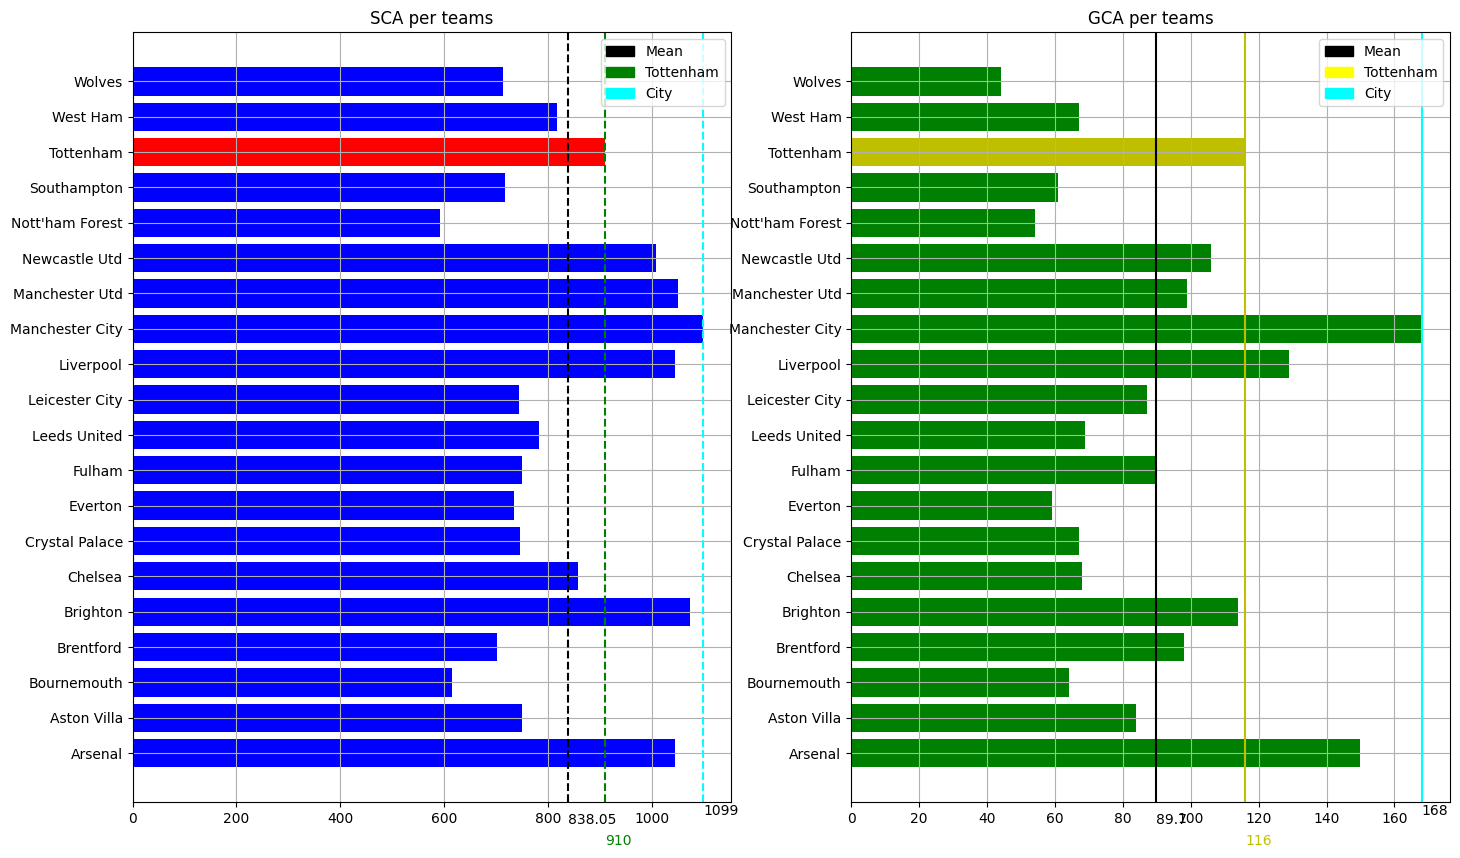

In [103]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico.keys()),list(dico.values()),color=colors)
ax[1].barh(list(dic.keys()),list(dic.values()),color=color)
ax[0].axvline(stat.mean(list(dico.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico.values())),-2, f'{stat.mean(list(dico.values()))}',color='black')
ax[0].axvline(dico["Tottenham"],color='green',linestyle='--')
ax[0].text(dico["Tottenham"],-2.6, f'{dico["Tottenham"]}',color='green')
ax[0].axvline(dico["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico["Manchester City"],-1.75, f'{dico["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic.values())),-2, f'{stat.mean(list(dic.values()))}',color='black')
ax[1].axvline(dic["Tottenham"],color='y',linestyle='-')
ax[1].text(dic["Tottenham"],-2.6, f'{dic["Tottenham"]}',color='y')
ax[1].axvline(dic["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic["Manchester City"],-1.75, f'{dic["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('SCA per teams')
ax[1].set_title('GCA per teams')
ax[0].grid(True)
ax[1].grid(True)


***subaxis6.2 : PassLive/GPassLive***

In [104]:
dico1 = df.set_index('Squad')['SPassLive'].to_dict()
dic1 = df.set_index('Squad')['GPassLive'].to_dict()

In [105]:
d2 = dico1.copy()
d3 = dico1.copy()
for (key,value) in d2.items():
  if value > np.percentile(list(d2.values()),90):
    d3[key]=20
  if value < np.percentile(list(d2.values()),90) and value > np.percentile(list(d2.values()),80):
    d3[key]=18
  if value < np.percentile(list(d2.values()),80) and value > np.percentile(list(d2.values()),70):
    d3[key]=16
  if value < np.percentile(list(d2.values()),70) and value > np.percentile(list(d2.values()),60):
    d3[key]=14
  if value < np.percentile(list(d2.values()),60) and value > np.percentile(list(d2.values()),50):
    d3[key]=12
  if value < np.percentile(list(d2.values()),50) and value > np.percentile(list(d2.values()),40):
    d3[key]=10
  if value < np.percentile(list(d2.values()),40) and value > np.percentile(list(d2.values()),30):
    d3[key]=8
  if value < np.percentile(list(d2.values()),30) and value > np.percentile(list(d2.values()),20):
    d3[key]=6
  if value < np.percentile(list(d2.values()),20) and value > np.percentile(list(d2.values()),10):
    d3[key]=4
  if value < np.percentile(list(d2.values()),10):
    d3[key]=2

pprint.pprint(d3)
print(f"Mean :{stat.mean(list(d3.values()))}\n")

dd2 = dic1.copy()
dd3 = dic1.copy()
for (key,value) in dd2.items():
  if value > np.percentile(list(dd2.values()),90):
    dd3[key]=20
  if value <= np.percentile(list(dd2.values()),90) and value > np.percentile(list(dd2.values()),80):
    dd3[key]=18
  if value <= np.percentile(list(dd2.values()),80) and value > np.percentile(list(dd2.values()),70):
    dd3[key]=16
  if value <= np.percentile(list(dd2.values()),70) and value > np.percentile(list(dd2.values()),60):
    dd3[key]=14
  if value <= np.percentile(list(dd2.values()),60) and value > np.percentile(list(dd2.values()),50):
    dd3[key]=12
  if value <= np.percentile(list(dd2.values()),50) and value > np.percentile(list(dd2.values()),40):
    dd3[key]=10
  if value <= np.percentile(list(dd2.values()),40) and value > np.percentile(list(dd2.values()),30):
    dd3[key]=8
  if value <= np.percentile(list(dd2.values()),30) and value > np.percentile(list(dd2.values()),20):
    dd3[key]=6
  if value <= np.percentile(list(dd2.values()),20) and value > np.percentile(list(dd2.values()),10):
    dd3[key]=4
  if value <= np.percentile(list(dd2.values()),10):
    dd3[key]=2

pprint.pprint(dd3)
print(f"Mean :{stat.mean(list(dd3.values()))}\n")


{'Arsenal': 16,
 'Aston Villa': 12,
 'Bournemouth': 2,
 'Brentford': 4,
 'Brighton': 18,
 'Chelsea': 14,
 'Crystal Palace': 6,
 'Everton': 6,
 'Fulham': 8,
 'Leeds United': 10,
 'Leicester City': 10,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 20,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 16,
 'West Ham': 12,
 'Wolves': 8}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 10,
 'Bournemouth': 8,
 'Brentford': 14,
 'Brighton': 16,
 'Chelsea': 12,
 'Crystal Palace': 6,
 'Everton': 4,
 'Fulham': 10,
 'Leeds United': 6,
 'Leicester City': 12,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 18,
 'West Ham': 4,
 'Wolves': 2}
Mean :10.8



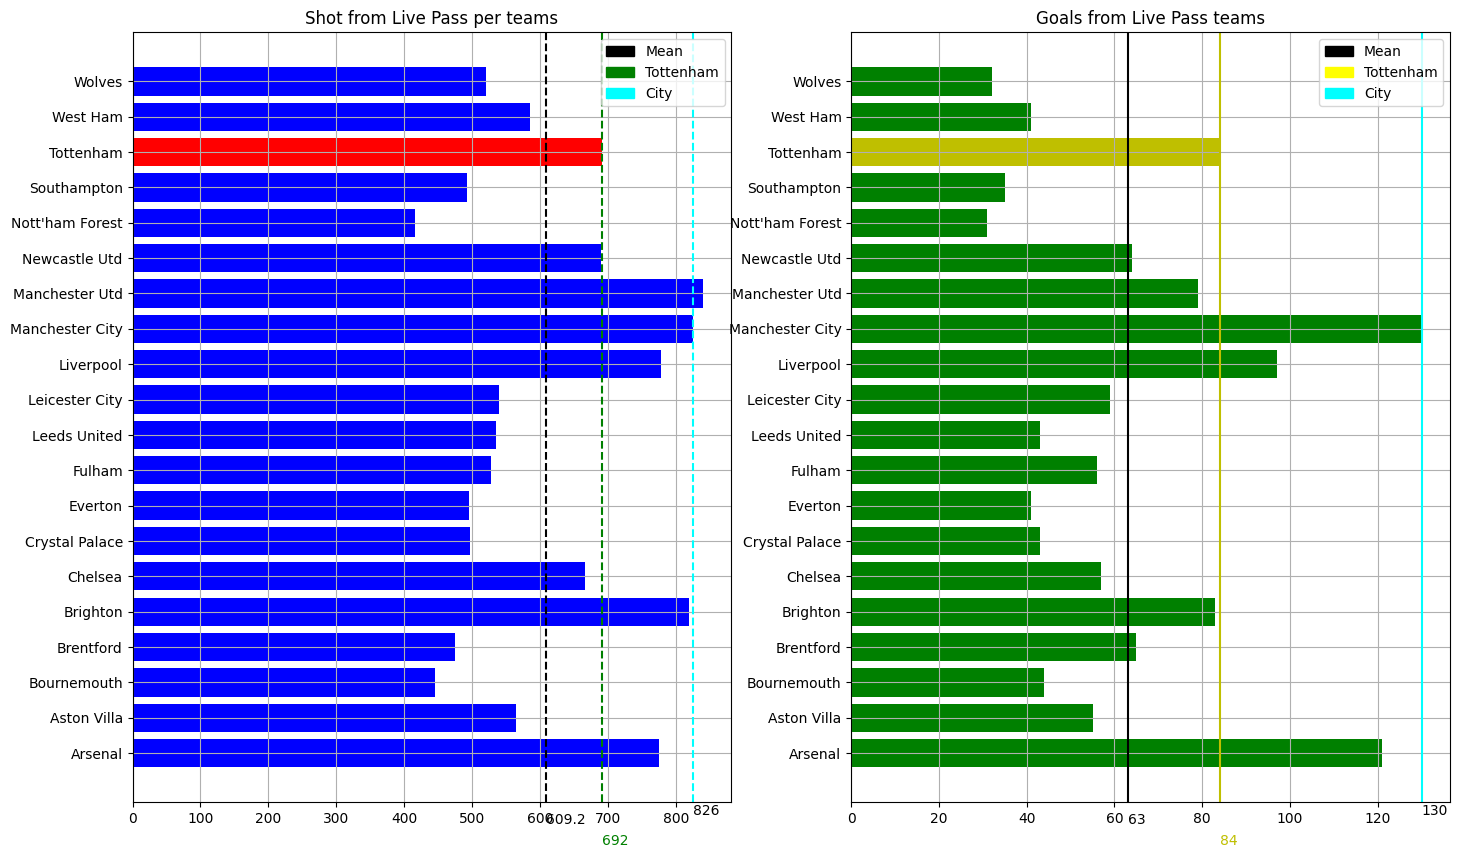

In [106]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico1.keys()),list(dico1.values()),color=colors)
ax[1].barh(list(dic1.keys()),list(dic1.values()),color=color)
ax[0].axvline(stat.mean(list(dico1.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico1.values())),-2, f'{stat.mean(list(dico1.values()))}',color='black')
ax[0].axvline(dico1["Tottenham"],color='green',linestyle='--')
ax[0].text(dico1["Tottenham"],-2.6, f'{dico1["Tottenham"]}',color='green')
ax[0].axvline(dico1["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico1["Manchester City"],-1.75, f'{dico1["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic1.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic1.values())),-2, f'{stat.mean(list(dic1.values()))}',color='black')
ax[1].axvline(dic1["Tottenham"],color='y',linestyle='-')
ax[1].text(dic1["Tottenham"],-2.6, f'{dic1["Tottenham"]}',color='y')
ax[1].axvline(dic1["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic1["Manchester City"],-1.75, f'{dic1["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Shot from Live Pass per teams')
ax[1].set_title('Goals from Live Pass teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis6.3 : SPassDead/GPassDead***

In [107]:
dico2 = df.set_index('Squad')['SPassDead'].to_dict()
dic2 = df.set_index('Squad')['GPassDead'].to_dict()

In [108]:
d4 = dico2.copy()
d5 = dico2.copy()
for (key,value) in d4.items():
  if value > np.percentile(list(d4.values()),90):
    d5[key]=20
  if value <= np.percentile(list(d4.values()),90) and value > np.percentile(list(d4.values()),80):
    d5[key]=18
  if value <= np.percentile(list(d4.values()),80) and value > np.percentile(list(d4.values()),70):
    d5[key]=16
  if value <= np.percentile(list(d4.values()),70) and value > np.percentile(list(d4.values()),60):
    d5[key]=14
  if value <= np.percentile(list(d4.values()),60) and value > np.percentile(list(d4.values()),50):
    d5[key]=12
  if value <= np.percentile(list(d4.values()),50) and value > np.percentile(list(d4.values()),40):
    d5[key]=10
  if value <= np.percentile(list(d4.values()),40) and value > np.percentile(list(d4.values()),30):
    d5[key]=8
  if value <= np.percentile(list(d4.values()),30) and value > np.percentile(list(d4.values()),20):
    d5[key]=6
  if value <= np.percentile(list(d4.values()),20) and value > np.percentile(list(d4.values()),10):
    d5[key]=4
  if value <= np.percentile(list(d4.values()),10):
    d5[key]=2

pprint.pprint(d5)
print(f"Mean :{stat.mean(list(d5.values()))}\n")

dd4 = dic2.copy()
dd5 = dic2.copy()
for (key,value) in dd4.items():
  if value > np.percentile(list(dd4.values()),90):
    dd5[key]=20
  if value <= np.percentile(list(dd4.values()),90) and value > np.percentile(list(dd4.values()),80):
    dd5[key]=18
  if value <= np.percentile(list(dd4.values()),80) and value > np.percentile(list(dd4.values()),70):
    dd5[key]=16
  if value <= np.percentile(list(dd4.values()),70) and value > np.percentile(list(dd4.values()),60):
    dd5[key]=14
  if value <= np.percentile(list(dd4.values()),60) and value > np.percentile(list(dd4.values()),50):
    dd5[key]=12
  if value <= np.percentile(list(dd4.values()),50) and value > np.percentile(list(dd4.values()),40):
    dd5[key]=10
  if value <= np.percentile(list(dd4.values()),40) and value > np.percentile(list(dd4.values()),30):
    dd5[key]=8
  if value <= np.percentile(list(dd4.values()),30) and value > np.percentile(list(dd4.values()),20):
    dd5[key]=6
  if value <= np.percentile(list(dd4.values()),20) and value > np.percentile(list(dd4.values()),10):
    dd5[key]=4
  if value <= np.percentile(list(dd4.values()),10):
    dd5[key]=2

pprint.pprint(dd5)
print(f"Mean :{stat.mean(list(dd5.values()))}\n")

{'Arsenal': 12,
 'Aston Villa': 2,
 'Bournemouth': 2,
 'Brentford': 18,
 'Brighton': 10,
 'Chelsea': 8,
 'Crystal Palace': 10,
 'Everton': 16,
 'Fulham': 12,
 'Leeds United': 18,
 'Leicester City': 4,
 'Liverpool': 18,
 'Manchester City': 14,
 'Manchester Utd': 4,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 6,
 'Southampton': 12,
 'Tottenham': 6,
 'West Ham': 14,
 'Wolves': 8}
Mean :10.7

{'Arsenal': 12,
 'Aston Villa': 2,
 'Bournemouth': 8,
 'Brentford': 18,
 'Brighton': 4,
 'Chelsea': 4,
 'Crystal Palace': 12,
 'Everton': 8,
 'Fulham': 20,
 'Leeds United': 16,
 'Leicester City': 2,
 'Liverpool': 20,
 'Manchester City': 16,
 'Manchester Utd': 4,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 8,
 'Southampton': 8,
 'Tottenham': 16,
 'West Ham': 12,
 'Wolves': 2}
Mean :10.2



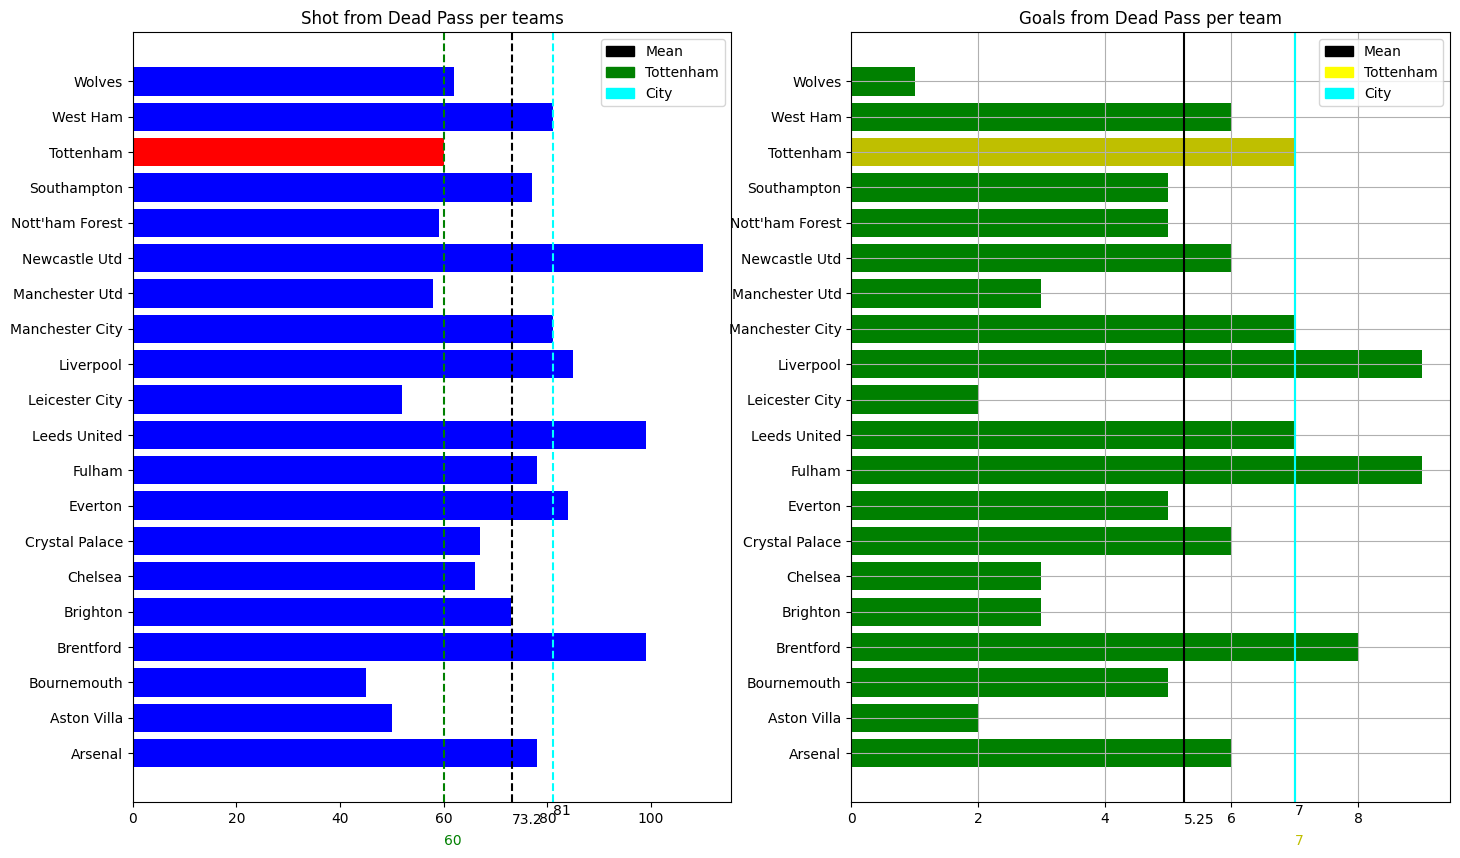

In [109]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico2.keys()),list(dico2.values()),color=colors)
ax[1].barh(list(dic2.keys()),list(dic2.values()),color=color)
ax[0].axvline(stat.mean(list(dico2.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico2.values())),-2, f'{stat.mean(list(dico2.values()))}',color='black')
ax[0].axvline(dico2["Tottenham"],color='green',linestyle='--')
ax[0].text(dico2["Tottenham"],-2.6, f'{dico2["Tottenham"]}',color='green')
ax[0].axvline(dico2["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico2["Manchester City"],-1.75, f'{dico2["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic2.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic2.values())),-2, f'{stat.mean(list(dic2.values()))}',color='black')
ax[1].axvline(dic2["Tottenham"],color='y',linestyle='-')
ax[1].text(dic2["Tottenham"],-2.6, f'{dic2["Tottenham"]}',color='y')
ax[1].axvline(dic2["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic2["Manchester City"],-1.75, f'{dic2["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
plt.title('Total Shots of Teams')
ax[0].set_title('Shot from Dead Pass per teams')
ax[1].set_title('Goals from Dead Pass per team')
ax[1].grid(True)

***subaxis6.4 : STO/GTO***

In [110]:
dico3 = df.set_index('Squad')['STO'].to_dict()
dic3 = df.set_index('Squad')['GTO'].to_dict()

In [111]:
d6 = dico3.copy()
d7 = dico3.copy()
for (key,value) in d6.items():
  if value > np.percentile(list(d6.values()),90):
    d7[key]=20
  if value <= np.percentile(list(d6.values()),90) and value > np.percentile(list(d6.values()),80):
    d7[key]=18
  if value <= np.percentile(list(d6.values()),80) and value > np.percentile(list(d6.values()),70):
    d7[key]=16
  if value <= np.percentile(list(d6.values()),70) and value > np.percentile(list(d6.values()),60):
    d7[key]=14
  if value <= np.percentile(list(d6.values()),60) and value > np.percentile(list(d6.values()),50):
    d7[key]=12
  if value <= np.percentile(list(d6.values()),50) and value > np.percentile(list(d6.values()),40):
    d7[key]=10
  if value <= np.percentile(list(d6.values()),40) and value > np.percentile(list(d6.values()),30):
    d7[key]=8
  if value <= np.percentile(list(d6.values()),30) and value > np.percentile(list(d6.values()),20):
    d7[key]=6
  if value <= np.percentile(list(d6.values()),20) and value > np.percentile(list(d6.values()),10):
    d7[key]=4
  if value <= np.percentile(list(d6.values()),10):
    d7[key]=2

pprint.pprint(d7)
print(f"Mean :{stat.mean(list(d7.values()))}\n")

dd6 = dic3.copy()
dd7 = dic3.copy()
for (key,value) in dd6.items():
  if value > np.percentile(list(dd6.values()),90):
    dd7[key]=20
  if value <= np.percentile(list(dd6.values()),90) and value > np.percentile(list(dd6.values()),80):
    dd7[key]=18
  if value <= np.percentile(list(dd6.values()),80) and value > np.percentile(list(dd6.values()),70):
    dd7[key]=16
  if value <= np.percentile(list(dd6.values()),70) and value > np.percentile(list(dd6.values()),60):
    dd7[key]=14
  if value <= np.percentile(list(dd6.values()),60) and value > np.percentile(list(dd6.values()),50):
    dd7[key]=12
  if value <= np.percentile(list(dd6.values()),50) and value > np.percentile(list(dd6.values()),40):
    dd7[key]=10
  if value <= np.percentile(list(dd6.values()),40) and value > np.percentile(list(dd6.values()),30):
    dd7[key]=8
  if value <= np.percentile(list(dd6.values()),30) and value > np.percentile(list(dd6.values()),20):
    dd7[key]=6
  if value <= np.percentile(list(dd6.values()),20) and value > np.percentile(list(dd6.values()),10):
    dd7[key]=4
  if value <= np.percentile(list(dd6.values()),10):
    dd7[key]=2

pprint.pprint(dd7)
print(f"Mean :{stat.mean(list(dd7.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 12,
 'Bournemouth': 14,
 'Brentford': 4,
 'Brighton': 20,
 'Chelsea': 8,
 'Crystal Palace': 18,
 'Everton': 6,
 'Fulham': 2,
 'Leeds United': 4,
 'Leicester City': 14,
 'Liverpool': 16,
 'Manchester City': 16,
 'Manchester Utd': 10,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 4,
 'Southampton': 10,
 'Tottenham': 10,
 'West Ham': 8,
 'Wolves': 2}
Mean :10.8

{'Arsenal': 8,
 'Aston Villa': 12,
 'Bournemouth': 4,
 'Brentford': 4,
 'Brighton': 20,
 'Chelsea': 2,
 'Crystal Palace': 12,
 'Everton': 8,
 'Fulham': 8,
 'Leeds United': 4,
 'Leicester City': 16,
 'Liverpool': 14,
 'Manchester City': 16,
 'Manchester Utd': 16,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 4,
 'Southampton': 14,
 'Tottenham': 14,
 'West Ham': 8,
 'Wolves': 2}
Mean :10.3



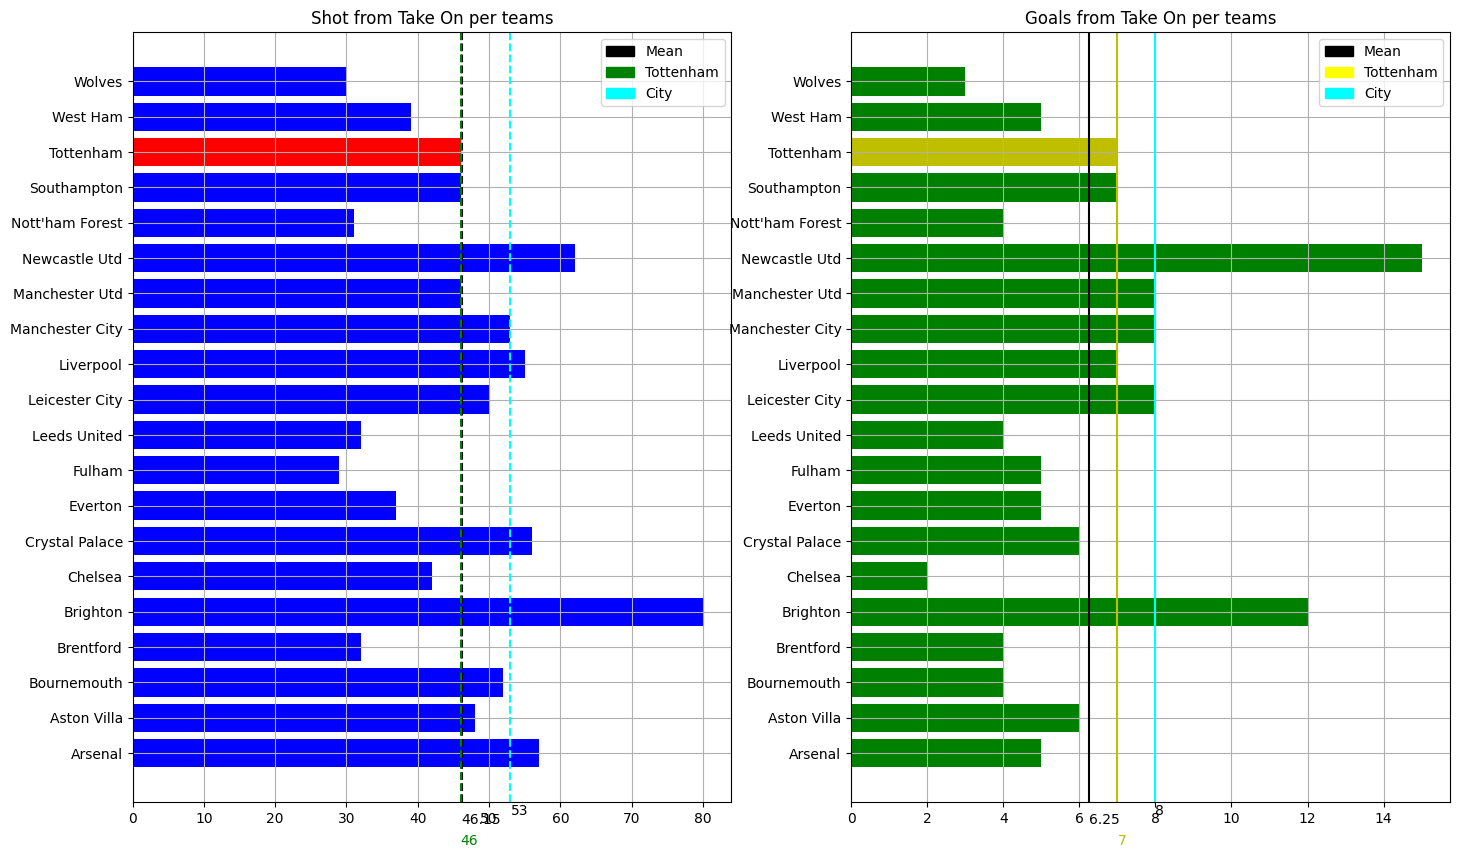

In [112]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico3.keys()),list(dico3.values()),color=colors)
ax[1].barh(list(dic3.keys()),list(dic3.values()),color=color)
ax[0].axvline(stat.mean(list(dico3.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico3.values())),-2, f'{stat.mean(list(dico3.values()))}',color='black')
ax[0].axvline(dico3["Tottenham"],color='green',linestyle='--')
ax[0].text(dico3["Tottenham"],-2.6, f'{dico3["Tottenham"]}',color='green')
ax[0].axvline(dico3["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico3["Manchester City"],-1.75, f'{dico3["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic3.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic3.values())),-2, f'{stat.mean(list(dic3.values()))}',color='black')
ax[1].axvline(dic3["Tottenham"],color='y',linestyle='-')
ax[1].text(dic3["Tottenham"],-2.6, f'{dic3["Tottenham"]}',color='y')
ax[1].axvline(dic3["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic3["Manchester City"],-1.75, f'{dic3["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Shot from Take On per teams')
ax[1].set_title('Goals from Take On per teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis6.5 : SSh/GSh***

In [113]:
dico4 = df.set_index('Squad')['SSh'].to_dict()
dic4 = df.set_index('Squad')['GSh'].to_dict()

In [114]:
d8 = dico4.copy()
d9 = dico4.copy()
for (key,value) in d8.items():
  if value > np.percentile(list(d8.values()),90):
    d9[key]=20
  if value <= np.percentile(list(d8.values()),90) and value > np.percentile(list(d8.values()),80):
    d9[key]=18
  if value <= np.percentile(list(d8.values()),80) and value > np.percentile(list(d8.values()),70):
    d9[key]=16
  if value <= np.percentile(list(d8.values()),70) and value > np.percentile(list(d8.values()),60):
    d9[key]=14
  if value <= np.percentile(list(d8.values()),60) and value > np.percentile(list(d8.values()),50):
    d9[key]=12
  if value <= np.percentile(list(d8.values()),50) and value > np.percentile(list(d8.values()),40):
    d9[key]=10
  if value <= np.percentile(list(d8.values()),40) and value > np.percentile(list(d8.values()),30):
    d9[key]=8
  if value <= np.percentile(list(d8.values()),30) and value > np.percentile(list(d8.values()),20):
    d9[key]=6
  if value <= np.percentile(list(d8.values()),20) and value > np.percentile(list(d8.values()),10):
    d9[key]=4
  if value <= np.percentile(list(d8.values()),10):
    d9[key]=2

pprint.pprint(d9)
print(f"Mean :{stat.mean(list(d9.values()))}\n")

dd8 = dic4.copy()
dd9 = dic4.copy()
for (key,value) in dd8.items():
  if value > np.percentile(list(dd8.values()),90):
    dd9[key]=20
  if value <= np.percentile(list(dd8.values()),90) and value > np.percentile(list(dd8.values()),80):
    dd9[key]=18
  if value <= np.percentile(list(dd8.values()),80) and value > np.percentile(list(dd8.values()),70):
    dd9[key]=16
  if value <= np.percentile(list(dd8.values()),70) and value > np.percentile(list(dd8.values()),60):
    dd9[key]=14
  if value <= np.percentile(list(dd8.values()),60) and value > np.percentile(list(dd8.values()),50):
    dd9[key]=12
  if value <= np.percentile(list(dd8.values()),50) and value > np.percentile(list(dd8.values()),40):
    dd9[key]=10
  if value <= np.percentile(list(dd8.values()),40) and value > np.percentile(list(dd8.values()),30):
    dd9[key]=8
  if value <= np.percentile(list(dd8.values()),30) and value > np.percentile(list(dd8.values()),20):
    dd9[key]=6
  if value <= np.percentile(list(dd8.values()),20) and value > np.percentile(list(dd8.values()),10):
    dd9[key]=4
  if value <= np.percentile(list(dd8.values()),10):
    dd9[key]=2

pprint.pprint(dd9)
print(f"Mean :{stat.mean(list(dd9.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 2,
 'Bournemouth': 4,
 'Brentford': 6,
 'Brighton': 16,
 'Chelsea': 4,
 'Crystal Palace': 8,
 'Everton': 10,
 'Fulham': 10,
 'Leeds United': 10,
 'Leicester City': 8,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 2,
 'Southampton': 10,
 'Tottenham': 14,
 'West Ham': 14,
 'Wolves': 6}
Mean :10.8

{'Arsenal': 20,
 'Aston Villa': 20,
 'Bournemouth': 8,
 'Brentford': 8,
 'Brighton': 12,
 'Chelsea': 2,
 'Crystal Palace': 6,
 'Everton': 2,
 'Fulham': 18,
 'Leeds United': 12,
 'Leicester City': 8,
 'Liverpool': 8,
 'Manchester City': 12,
 'Manchester Utd': 4,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 18,
 'Southampton': 4,
 'Tottenham': 12,
 'West Ham': 12,
 'Wolves': 6}
Mean :10.4



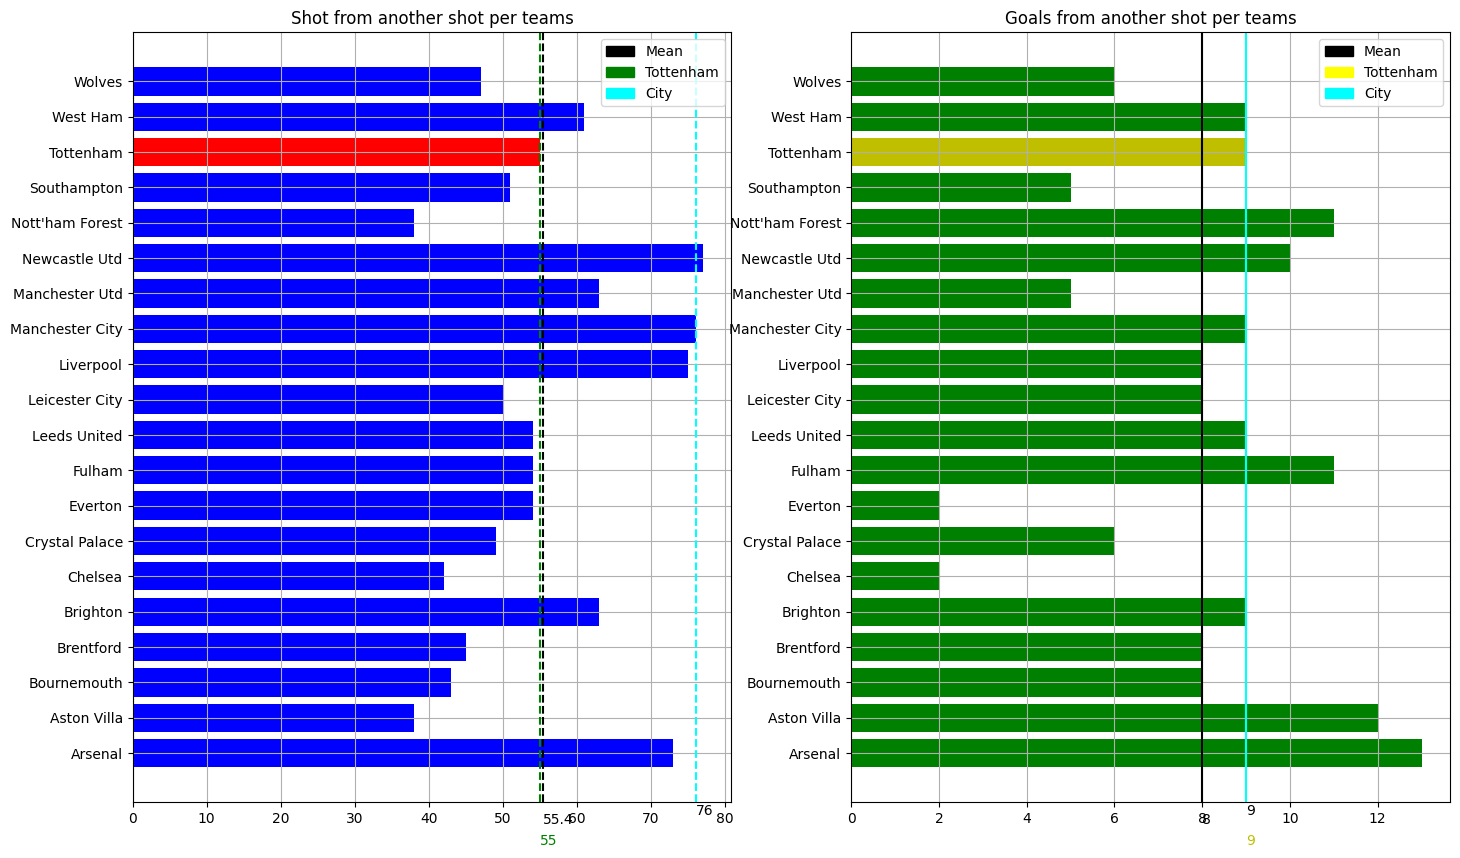

In [115]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico4.keys()),list(dico4.values()),color=colors)
ax[1].barh(list(dic4.keys()),list(dic4.values()),color=color)
ax[0].axvline(stat.mean(list(dico4.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico4.values())),-2, f'{stat.mean(list(dico4.values()))}',color='black')
ax[0].axvline(dico4["Tottenham"],color='green',linestyle='--')
ax[0].text(dico4["Tottenham"],-2.6, f'{dico4["Tottenham"]}',color='green')
ax[0].axvline(dico4["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico4["Manchester City"],-1.75, f'{dico4["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic4.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic4.values())),-2, f'{stat.mean(list(dic4.values()))}',color='black')
ax[1].axvline(dic4["Tottenham"],color='y',linestyle='-')
ax[1].text(dic4["Tottenham"],-2.6, f'{dic4["Tottenham"]}',color='y')
ax[1].axvline(dic4["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic4["Manchester City"],-1.75, f'{dic4["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Shot from another shot per teams')
ax[1].set_title('Goals from another shot per teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis6.6 : SDef/Gdef***

In [116]:
dico5 = df.set_index('Squad')['SDef'].to_dict()
dic5 = df.set_index('Squad')['GDef'].to_dict()

In [117]:
d10 = dico5.copy()
d11 = dico5.copy()
for (key,value) in d10.items():
  if value > np.percentile(list(d10.values()),90):
    d11[key]=20
  if value <= np.percentile(list(d10.values()),90) and value > np.percentile(list(d10.values()),80):
    d11[key]=18
  if value <= np.percentile(list(d10.values()),80) and value > np.percentile(list(d10.values()),70):
    d11[key]=16
  if value <= np.percentile(list(d10.values()),70) and value > np.percentile(list(d10.values()),60):
    d11[key]=14
  if value <= np.percentile(list(d10.values()),60) and value > np.percentile(list(d10.values()),50):
    d11[key]=12
  if value <= np.percentile(list(d10.values()),50) and value > np.percentile(list(d10.values()),40):
    d11[key]=10
  if value <= np.percentile(list(d10.values()),40) and value > np.percentile(list(d10.values()),30):
    d11[key]=8
  if value <= np.percentile(list(d10.values()),30) and value > np.percentile(list(d10.values()),20):
    d11[key]=6
  if value <= np.percentile(list(d10.values()),20) and value > np.percentile(list(d10.values()),10):
    d11[key]=4
  if value <= np.percentile(list(d10.values()),10):
    d11[key]=2

pprint.pprint(d11)
print(f"Mean :{stat.mean(list(d11.values()))}\n")

dd10 = dic5.copy()
dd11 = dic5.copy()
for (key,value) in dd10.items():
  if value > np.percentile(list(dd10.values()),90):
    dd11[key]=20
  if value <= np.percentile(list(dd10.values()),90) and value > np.percentile(list(dd10.values()),80):
    dd11[key]=18
  if value <= np.percentile(list(dd10.values()),80) and value > np.percentile(list(dd10.values()),70):
    dd11[key]=16
  if value <= np.percentile(list(dd10.values()),70) and value > np.percentile(list(dd10.values()),60):
    dd11[key]=14
  if value <= np.percentile(list(dd10.values()),60) and value > np.percentile(list(dd10.values()),50):
    dd11[key]=12
  if value <= np.percentile(list(dd10.values()),50) and value > np.percentile(list(dd10.values()),40):
    dd11[key]=10
  if value <= np.percentile(list(dd10.values()),40) and value > np.percentile(list(dd10.values()),30):
    dd11[key]=8
  if value <= np.percentile(list(dd10.values()),30) and value > np.percentile(list(dd10.values()),20):
    dd11[key]=6
  if value <= np.percentile(list(dd10.values()),20) and value > np.percentile(list(dd10.values()),10):
    dd11[key]=4
  if value <= np.percentile(list(dd10.values()),10):
    dd11[key]=2

pprint.pprint(dd11)
print(f"Mean :{stat.mean(list(dd11.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 4,
 'Bournemouth': 2,
 'Brentford': 2,
 'Brighton': 8,
 'Chelsea': 6,
 'Crystal Palace': 16,
 'Everton': 20,
 'Fulham': 14,
 'Leeds United': 14,
 'Leicester City': 12,
 'Liverpool': 20,
 'Manchester City': 12,
 'Manchester Utd': 4,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 10,
 'Southampton': 10,
 'Tottenham': 18,
 'West Ham': 14,
 'Wolves': 6}
Mean :10.8

{'Arsenal': 10,
 'Aston Villa': 16,
 'Bournemouth': 6,
 'Brentford': 10,
 'Brighton': 6,
 'Chelsea': 2,
 'Crystal Palace': 10,
 'Everton': 10,
 'Fulham': 10,
 'Leeds United': 16,
 'Leicester City': 16,
 'Liverpool': 6,
 'Manchester City': 10,
 'Manchester Utd': 2,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 2,
 'Southampton': 16,
 'Tottenham': 10,
 'West Ham': 2,
 'Wolves': 6}
Mean :9.3



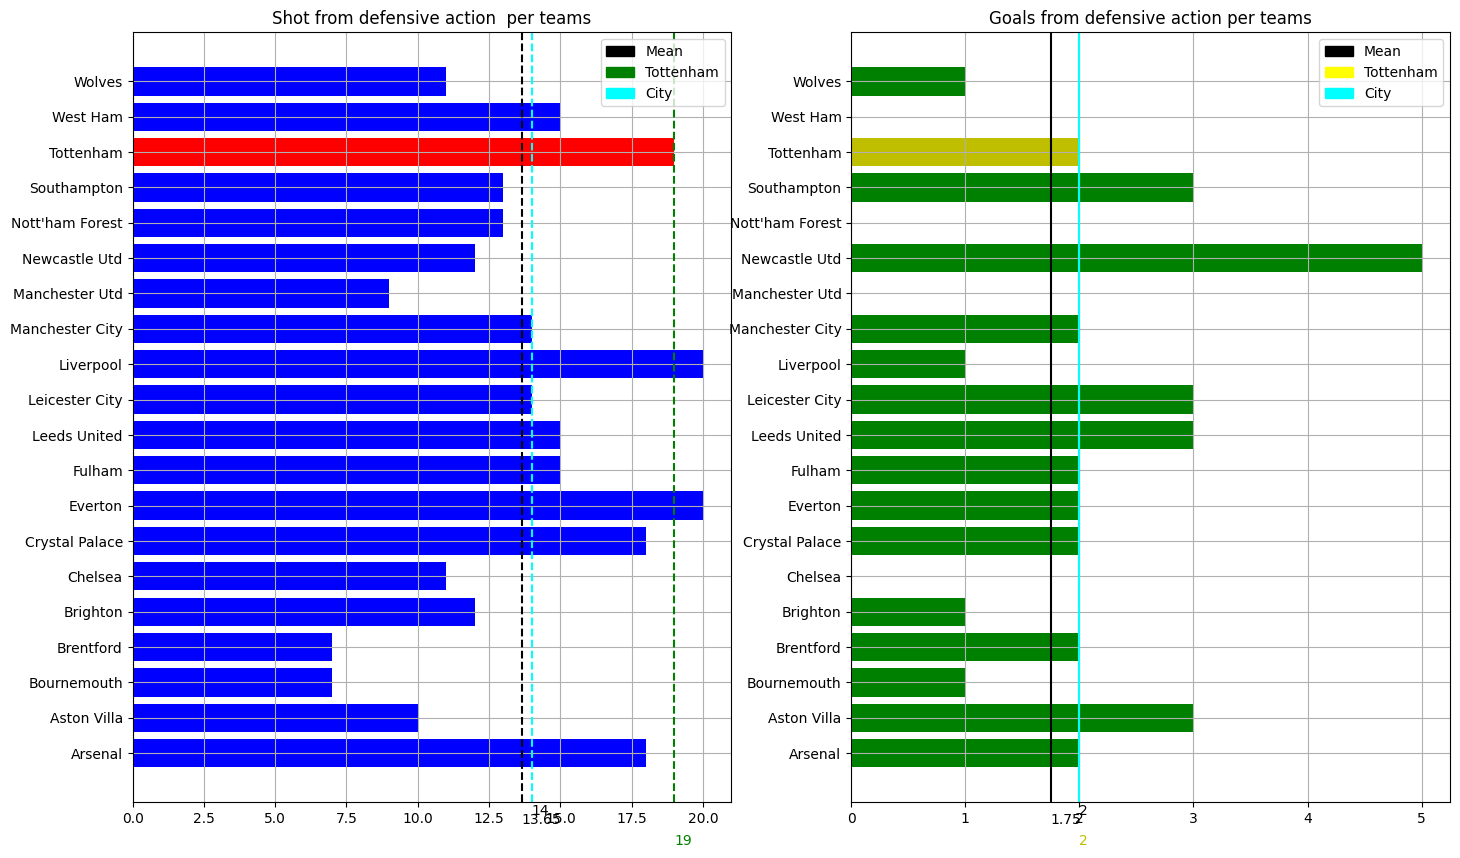

In [118]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico5.keys()),list(dico5.values()),color=colors)
ax[1].barh(list(dic5.keys()),list(dic5.values()),color=color)
ax[0].axvline(stat.mean(list(dico5.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico5.values())),-2, f'{stat.mean(list(dico5.values()))}',color='black')
ax[0].axvline(dico5["Tottenham"],color='green',linestyle='--')
ax[0].text(dico5["Tottenham"],-2.6, f'{dico5["Tottenham"]}',color='green')
ax[0].axvline(dico5["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico5["Manchester City"],-1.75, f'{dico5["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic5.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic5.values())),-2, f'{stat.mean(list(dic5.values()))}',color='black')
ax[1].axvline(dic5["Tottenham"],color='y',linestyle='-')
ax[1].text(dic5["Tottenham"],-2.6, f'{dic5["Tottenham"]}',color='y')
ax[1].axvline(dic5["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic5["Manchester City"],-1.75, f'{dic5["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Shot from defensive action  per teams')
ax[1].set_title('Goals from defensive action per teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis6.7 : SFld/GFld***

In [119]:
dico6 = df.set_index('Squad')['SFld'].to_dict()
dic6 = df.set_index('Squad')['GFld'].to_dict()

In [120]:
d12 = dico6.copy()
d13 = dico6.copy()
for (key,value) in d12.items():
  if value > np.percentile(list(d12.values()),90):
    d13[key]=20
  if value <= np.percentile(list(d12.values()),90) and value > np.percentile(list(d12.values()),80):
    d13[key]=18
  if value <= np.percentile(list(d12.values()),80) and value > np.percentile(list(d12.values()),70):
    d13[key]=16
  if value <= np.percentile(list(d12.values()),70) and value > np.percentile(list(d12.values()),60):
    d13[key]=14
  if value <= np.percentile(list(d12.values()),60) and value > np.percentile(list(d12.values()),50):
    d13[key]=12
  if value <= np.percentile(list(d12.values()),50) and value > np.percentile(list(d12.values()),40):
    d13[key]=10
  if value <= np.percentile(list(d12.values()),40) and value > np.percentile(list(d12.values()),30):
    d13[key]=8
  if value <= np.percentile(list(d12.values()),30) and value > np.percentile(list(d12.values()),20):
    d13[key]=6
  if value <= np.percentile(list(d12.values()),20) and value > np.percentile(list(d12.values()),10):
    d13[key]=4
  if value <= np.percentile(list(d12.values()),10):
    d13[key]=2

pprint.pprint(d13)
print(f"Mean :{stat.mean(list(d13.values()))}\n")

dd12 = dic6.copy()
dd13 = dic6.copy()
for (key,value) in dd12.items():
  if value > np.percentile(list(dd12.values()),90):
    dd13[key]=20
  if value <= np.percentile(list(dd12.values()),90) and value > np.percentile(list(dd12.values()),80):
    dd13[key]=18
  if value <= np.percentile(list(dd12.values()),80) and value > np.percentile(list(dd12.values()),70):
    dd13[key]=16
  if value <= np.percentile(list(dd12.values()),70) and value > np.percentile(list(dd12.values()),60):
    dd13[key]=14
  if value <= np.percentile(list(dd12.values()),60) and value > np.percentile(list(dd12.values()),50):
    dd13[key]=12
  if value <= np.percentile(list(dd12.values()),50) and value > np.percentile(list(dd12.values()),40):
    dd13[key]=10
  if value <= np.percentile(list(dd12.values()),40) and value > np.percentile(list(dd12.values()),30):
    dd13[key]=8
  if value <= np.percentile(list(dd12.values()),30) and value > np.percentile(list(dd12.values()),20):
    dd13[key]=6
  if value <= np.percentile(list(dd12.values()),20) and value > np.percentile(list(dd12.values()),10):
    dd13[key]=4
  if value <= np.percentile(list(dd12.values()),10):
    dd13[key]=2

pprint.pprint(dd13)
print(f"Mean :{stat.mean(list(dd13.values()))}\n")

{'Arsenal': 14,
 'Aston Villa': 12,
 'Bournemouth': 2,
 'Brentford': 14,
 'Brighton': 2,
 'Chelsea': 4,
 'Crystal Palace': 20,
 'Everton': 16,
 'Fulham': 16,
 'Leeds United': 18,
 'Leicester City': 8,
 'Liverpool': 4,
 'Manchester City': 18,
 'Manchester Utd': 6,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 8,
 'Southampton': 8,
 'Tottenham': 8,
 'West Ham': 6,
 'Wolves': 12}
Mean :10.8

{'Arsenal': 4,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 20,
 'Brighton': 10,
 'Chelsea': 6,
 'Crystal Palace': 6,
 'Everton': 6,
 'Fulham': 16,
 'Leeds United': 4,
 'Leicester City': 16,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 6,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 4,
 'Southampton': 10,
 'Tottenham': 16,
 'West Ham': 10,
 'Wolves': 2}
Mean :9.7



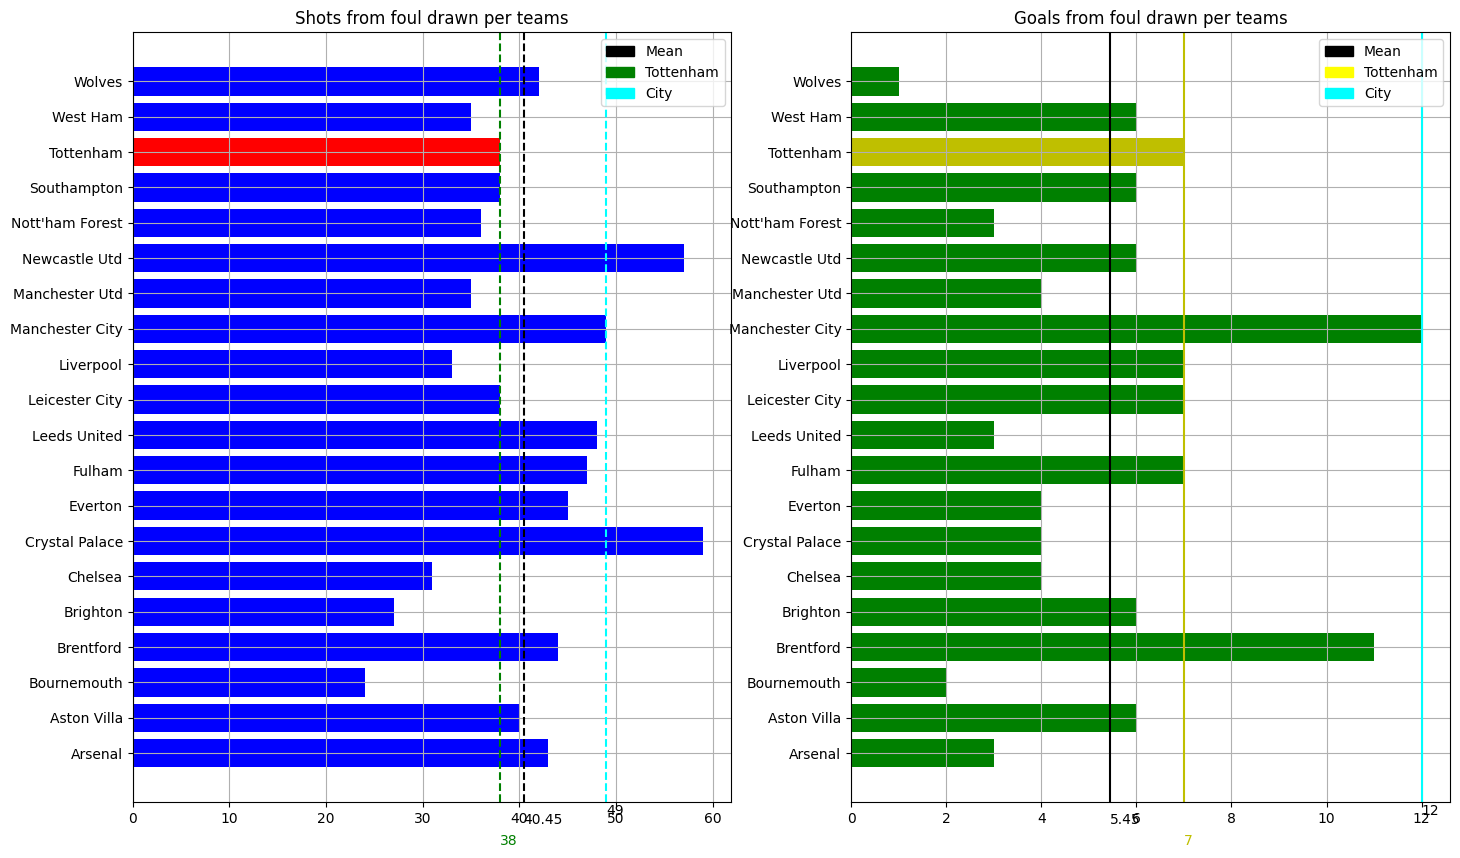

In [121]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico6.keys()),list(dico6.values()),color=colors)
ax[1].barh(list(dic6.keys()),list(dic6.values()),color=color)
ax[0].axvline(stat.mean(list(dico6.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico6.values())),-2, f'{stat.mean(list(dico6.values()))}',color='black')
ax[0].axvline(dico6["Tottenham"],color='green',linestyle='--')
ax[0].text(dico6["Tottenham"],-2.6, f'{dico6["Tottenham"]}',color='green')
ax[0].axvline(dico6["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico6["Manchester City"],-1.75, f'{dico6["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic6.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic6.values())),-2, f'{stat.mean(list(dic6.values()))}',color='black')
ax[1].axvline(dic6["Tottenham"],color='y',linestyle='-')
ax[1].text(dic6["Tottenham"],-2.6, f'{dic6["Tottenham"]}',color='y')
ax[1].axvline(dic6["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic6["Manchester City"],-1.75, f'{dic6["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
plt.title('Total Shots of Teams')
ax[0].set_title('Shots from foul drawn per teams')
ax[1].set_title('Goals from foul drawn per teams')
ax[0].grid(True)
ax[1].grid(True)

In [122]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    dictionnaire_moyenne[clé] = moyenne_valeur
  return dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [d1,dd1,d3,dd3,d5,dd5,d7,dd7,d9,dd9,d11,dd11,d13,dd13]

dictionnaire_moyenne = calculer_moyenne(dictionnaires)

dictionnaire_moyenne = dict(sorted(dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(dictionnaire_moyenne)

Manchester City: 16.714285714285715
Newcastle Utd: 16.142857142857142
Liverpool: 15.142857142857142
Arsenal: 14.571428571428571
Tottenham: 13.571428571428571
Brighton: 12.714285714285714
Fulham: 11.857142857142858
Leeds United: 11.0
Leicester City: 10.428571428571429
Crystal Palace: 10.285714285714286
Brentford: 10.0
Manchester Utd: 10.0
Aston Villa: 9.571428571428571
West Ham: 9.571428571428571
Everton: 8.714285714285714
Southampton: 8.571428571428571
Chelsea: 6.714285714285714
Nott'ham Forest: 5.285714285714286
Bournemouth: 5.0
Wolves: 4.857142857142857


# ***2-Players Rating ans Selection***

In [123]:
data = pd.read_excel('/content/all_players_gsc_stats.xlsx')
dicttt = data.set_index('Player')['Squad'].to_dict()
g = data.set_index('Player')['90s'].to_dict()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [124]:
def replace_nan_values_with_l_keys(l):
  """Returns a new dictionary containing the original list, with NaN values replaced by 0, and using the keys of l as the keys of the dictionary."""
  dictionary = {}
  for key, value in l.items():
    if math.isnan(value):
      dictionary[key] = 0
    else:
      dictionary[key] = value
  return dictionary

***subaxis6.1.1 : SCA***



In [125]:
gsc = data.set_index('Player')['SCA'].to_dict()
gscb = replace_nan_values_with_l_keys(gsc)
d = gscb.copy()

In [126]:
di = {
        (np.percentile(list(d.values()),0),np.percentile(list(d.values()),5)): 1,
        (np.percentile(list(d.values()),5),np.percentile(list(d.values()),10)): 2,
        (np.percentile(list(d.values()),10),np.percentile(list(d.values()),15)): 3,
        (np.percentile(list(d.values()),15),np.percentile(list(d.values()),20)):4,
        (np.percentile(list(d.values()),20),np.percentile(list(d.values()),25)): 5,
        (np.percentile(list(d.values()),25),np.percentile(list(d.values()),30)): 6,
        (np.percentile(list(d.values()),30),np.percentile(list(d.values()),35)): 7,
        (np.percentile(list(d.values()),35),np.percentile(list(d.values()),40)):8,
        (np.percentile(list(d.values()),40),np.percentile(list(d.values()),45)): 9,
        (np.percentile(list(d.values()),45),np.percentile(list(d.values()),50)): 10,
        (np.percentile(list(d.values()),50),np.percentile(list(d.values()),55)): 11,
        (np.percentile(list(d.values()),55),np.percentile(list(d.values()),60)):12,
        (np.percentile(list(d.values()),60),np.percentile(list(d.values()),65)): 13,
        (np.percentile(list(d.values()),65),np.percentile(list(d.values()),75)): 14,
        (np.percentile(list(d.values()),75),np.percentile(list(d.values()),80)):15,
        (np.percentile(list(d.values()),80),np.percentile(list(d.values()),85)): 16,
        (np.percentile(list(d.values()),85),np.percentile(list(d.values()),90)): 17,
        (np.percentile(list(d.values()),90),np.percentile(list(d.values()),96)): 18,
        (np.percentile(list(d.values()),96),np.percentile(list(d.values()),98)):19,
        (np.percentile(list(d.values()),98),np.percentile(list(d.values()),100)):20,
    }

def aux(d,key1,value):
    d[key1] = next((score for age_range, score in di.copy().items() if age_range[0] <= value <= age_range[1]))

In [127]:
ll= gscb.copy()

for (key,value) in ll.copy().items():
  aux(ll,key,value)

pprint.pprint(ll)
print(f"Mean :{stat.mean(list(ll.values()))}\n")

{'Aaron Cresswell': 18,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 5,
 'Aaron Ramsey': 17,
 'Aaron Wan-Bissaka': 13,
 'Aaron Zehnter': 2,
 'Aarón Martín': 17,
 'Abdallah Sima': 14,
 'Abdelhamid Sabiri': 14,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 6,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 5,
 'Abdoulaye Bamba': 7,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 12,
 'Abdul Mumin': 6,
 'Abdón Prats': 6,
 'Abner': 7,
 'Achraf Dari': 7,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 12,
 'Adam Buksa': 3,
 'Adam Forshaw': 10,
 'Adam Hložek': 14,
 'Adam Lallana': 12,
 'Adam Marušić': 14,
 'Adam Masina': 6,
 'Adam Ounas': 16,
 'Adam Smith': 13,
 'Adam Webster': 11,
 'Adama Soumaoro': 7,
 'Adama Traoré': 15,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 6,
 'Adil Rami': 8,
 'Adnan Januzaj': 2,
 'Ado Onaiwu': 11,
 'Adolfo Gaich': 11,
 'Adri Embarba': 4,
 'Adrian Grbić': 2,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 16,
 'Adrien Thomasson': 14,
 'Adrien Truffert': 16,
 'Adrià Pedros

In [128]:
tt0 = ll.copy()
ttt = dicttt.copy()
for (key,value) in tt0.copy().items():
  if value < np.percentile(list(tt0.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt0[key]
pprint.pprint(tt0)

{'Aleix García': 20,
 'Aleksandr Golovin': 20,
 'Alex Iwobi': 20,
 'Antoine Griezmann': 20,
 'Benjamin Bourigeaud': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Cristiano Biraghi': 20,
 'Dominik Szoboszlai': 20,
 'Enzo Le Fée': 20,
 'Florian Kainz': 20,
 'Florian Sotoca': 20,
 'Franck Honorat': 20,
 'Gerard Gumbau': 20,
 'Hakan Çalhanoğlu': 20,
 'Harry Kane': 20,
 'Iago Aspas': 20,
 'Isaac Palazón Camacho': 20,
 'Jamal Musiala': 20,
 'James Maddison': 20,
 'James Ward-Prowse': 20,
 'Jonas Hofmann': 20,
 'Joshua Kimmich': 20,
 'Jude Bellingham': 20,
 'Julian Brandt': 20,
 'Junya Ito': 20,
 'Kevin De Bruyne': 20,
 'Kevin Stöger': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kieran Trippier': 20,
 'Kylian Mbappé': 20,
 'Lionel Messi': 20,
 'Lorenzo Pellegrini': 20,
 'Ludovic Blas': 20,
 'Michael Olise': 20,
 'Mohamed Salah': 20,
 'Nicolò Barella': 20,
 'Pascal Groß': 20,
 'Piotr Zieliński': 20,
 'Przemysław Frankowski': 20,
 'Rafael Leão': 20,
 'Rayan Cherki': 20,
 'Rodrygo': 20,
 '

***subaxis6.1.2 : GCA***

In [129]:
gsc1 = data.set_index('Player')['GCA'].to_dict()
gsc1b = replace_nan_values_with_l_keys(gsc1)
d1 = gsc1b.copy()

In [130]:
di1 = {
        (np.percentile(list(d1.values()),0),np.percentile(list(d1.values()),5)): 1,
        (np.percentile(list(d1.values()),5),np.percentile(list(d1.values()),10)): 2,
        (np.percentile(list(d1.values()),10),np.percentile(list(d1.values()),15)): 3,
        (np.percentile(list(d1.values()),15),np.percentile(list(d1.values()),20)):4,
        (np.percentile(list(d1.values()),20),np.percentile(list(d1.values()),25)): 5,
        (np.percentile(list(d1.values()),25),np.percentile(list(d1.values()),30)): 6,
        (np.percentile(list(d1.values()),30),np.percentile(list(d1.values()),35)): 7,
        (np.percentile(list(d1.values()),35),np.percentile(list(d1.values()),40)):8,
        (np.percentile(list(d1.values()),40),np.percentile(list(d1.values()),45)): 9,
        (np.percentile(list(d1.values()),45),np.percentile(list(d1.values()),50)): 10,
        (np.percentile(list(d1.values()),50),np.percentile(list(d1.values()),55)): 11,
        (np.percentile(list(d1.values()),55),np.percentile(list(d1.values()),60)):12,
        (np.percentile(list(d1.values()),60),np.percentile(list(d1.values()),65)): 13,
        (np.percentile(list(d1.values()),65),np.percentile(list(d1.values()),75)): 14,
        (np.percentile(list(d1.values()),75),np.percentile(list(d1.values()),80)):15,
        (np.percentile(list(d1.values()),80),np.percentile(list(d1.values()),85)): 16,
        (np.percentile(list(d1.values()),85),np.percentile(list(d1.values()),90)): 17,
        (np.percentile(list(d1.values()),90),np.percentile(list(d1.values()),96)): 18,
        (np.percentile(list(d1.values()),96),np.percentile(list(d1.values()),98)):19,
        (np.percentile(list(d1.values()),98),np.percentile(list(d1.values()),100)):20,
    }

def aux1(d,key1,value):
    d[key1] = next((score for age_range, score in di1.copy().items() if age_range[0] <= value <= age_range[1]))

In [131]:
ll1= gsc1b.copy()

for (key,value) in ll1.copy().items():
  aux1(ll1,key,value)

pprint.pprint(ll1)
print(f"Mean :{stat.mean(list(ll1.values()))}\n")

{'Aaron Cresswell': 8,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 7,
 'Aaron Ramsey': 14,
 'Aaron Wan-Bissaka': 8,
 'Aaron Zehnter': 7,
 'Aarón Martín': 15,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 7,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 7,
 'Abdou Harroui': 8,
 'Abdoul Kader Bamba': 7,
 'Abdoulaye Bamba': 7,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 11,
 'Abdul Mumin': 7,
 'Abdón Prats': 8,
 'Abner': 8,
 'Achraf Dari': 11,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 11,
 'Adam Buksa': 7,
 'Adam Forshaw': 7,
 'Adam Hložek': 17,
 'Adam Lallana': 11,
 'Adam Marušić': 13,
 'Adam Masina': 7,
 'Adam Ounas': 16,
 'Adam Smith': 11,
 'Adam Webster': 8,
 'Adama Soumaoro': 8,
 'Adama Traoré': 14,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 7,
 'Adil Rami': 8,
 'Adnan Januzaj': 7,
 'Ado Onaiwu': 8,
 'Adolfo Gaich': 8,
 'Adri Embarba': 7,
 'Adrian Grbić': 7,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 13,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 17,
 'Adrià Pedrosa': 7,


In [132]:
tt1 = ll1.copy()
ttt = dicttt.copy()
for (key,value) in tt1.copy().items():
  if value < np.percentile(list(tt1.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt1[key]
pprint.pprint(tt1)

{'Aleix García': 20,
 'Antoine Griezmann': 20,
 'Benjamin Bourigeaud': 20,
 'Brahim Díaz': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Daichi Kamada': 20,
 'Domenico Berardi': 20,
 'Dominik Szoboszlai': 20,
 'Eberechi Eze': 20,
 'Erling Haaland': 20,
 'Florian Kainz': 20,
 'Florian Sotoca': 20,
 'Harry Kane': 20,
 'Jack Grealish': 20,
 'Jamal Musiala': 20,
 'Jeremie Frimpong': 20,
 'Jonas Hofmann': 20,
 'Jude Bellingham': 20,
 'Julian Brandt': 20,
 'Kevin De Bruyne': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lautaro Martínez': 20,
 'Lionel Messi': 20,
 'Marvin Ducksch': 20,
 'Mitchell Weiser': 20,
 'Mohamed Salah': 20,
 'Moussa Diaby': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Rayan Cherki': 20,
 'Riyad Mahrez': 20,
 'Robert Lewandowski': 20,
 'Rodrygo': 20,
 'Rémy Cabella': 20,
 'Teun Koopmeiners': 20,
 'Trent Alexander-Arnold': 20,
 'Vinicius Júnior': 20,
 'İlkay Gündoğan': 20}


***subaxis6.2.1 : SPassLive***

In [133]:
gsc2 = data.set_index('Player')['SPassLive'].to_dict()
gsc2b = replace_nan_values_with_l_keys(gsc2)
d2 = gsc2b.copy()

In [134]:
di2 = {
        (np.percentile(list(d2.values()),0),np.percentile(list(d2.values()),5)): 1,
        (np.percentile(list(d2.values()),5),np.percentile(list(d2.values()),10)): 2,
        (np.percentile(list(d2.values()),10),np.percentile(list(d2.values()),15)): 3,
        (np.percentile(list(d2.values()),15),np.percentile(list(d2.values()),20)):4,
        (np.percentile(list(d2.values()),20),np.percentile(list(d2.values()),25)): 5,
        (np.percentile(list(d2.values()),25),np.percentile(list(d2.values()),30)): 6,
        (np.percentile(list(d2.values()),30),np.percentile(list(d2.values()),35)): 7,
        (np.percentile(list(d2.values()),35),np.percentile(list(d2.values()),40)):8,
        (np.percentile(list(d2.values()),40),np.percentile(list(d2.values()),45)): 9,
        (np.percentile(list(d2.values()),45),np.percentile(list(d2.values()),50)): 10,
        (np.percentile(list(d2.values()),50),np.percentile(list(d2.values()),55)): 11,
        (np.percentile(list(d2.values()),55),np.percentile(list(d2.values()),60)):12,
        (np.percentile(list(d2.values()),60),np.percentile(list(d2.values()),65)): 13,
        (np.percentile(list(d2.values()),65),np.percentile(list(d2.values()),75)): 14,
        (np.percentile(list(d2.values()),75),np.percentile(list(d2.values()),80)):15,
        (np.percentile(list(d2.values()),80),np.percentile(list(d2.values()),85)): 16,
        (np.percentile(list(d2.values()),85),np.percentile(list(d2.values()),90)): 17,
        (np.percentile(list(d2.values()),90),np.percentile(list(d2.values()),96)): 18,
        (np.percentile(list(d2.values()),96),np.percentile(list(d2.values()),98)):19,
        (np.percentile(list(d2.values()),98),np.percentile(list(d2.values()),100)):20,
    }

def aux2(d,key1,value):
    d[key1] = next((score for age_range, score in di2.copy().items() if age_range[0] <= value <= age_range[1]))

In [135]:
ll2= gsc2b.copy()

for (key,value) in ll2.copy().items():
  aux2(ll2,key,value)

pprint.pprint(ll2)
print(f"Mean :{stat.mean(list(ll2.values()))}\n")

{'Aaron Cresswell': 16,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 5,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 14,
 'Aaron Zehnter': 2,
 'Aarón Martín': 16,
 'Abdallah Sima': 14,
 'Abdelhamid Sabiri': 13,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 7,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 8,
 'Abdoulaye Doucouré': 16,
 'Abdu Conté': 13,
 'Abdul Mumin': 6,
 'Abdón Prats': 7,
 'Abner': 7,
 'Achraf Dari': 5,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 12,
 'Adam Buksa': 3,
 'Adam Forshaw': 9,
 'Adam Hložek': 14,
 'Adam Lallana': 13,
 'Adam Marušić': 14,
 'Adam Masina': 7,
 'Adam Ounas': 15,
 'Adam Smith': 14,
 'Adam Webster': 12,
 'Adama Soumaoro': 8,
 'Adama Traoré': 16,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 5,
 'Adil Rami': 8,
 'Adnan Januzaj': 2,
 'Ado Onaiwu': 12,
 'Adolfo Gaich': 11,
 'Adri Embarba': 2,
 'Adrian Grbić': 2,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 17,
 'Adrien Thomasson': 16,
 'Adrien Truffert': 16,
 'Adrià Pedrosa

In [136]:
tt2 = ll2.copy()
ttt = dicttt.copy()
for (key,value) in tt2.copy().items():
  if value < np.percentile(list(tt2.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt2[key]
pprint.pprint(tt2)

{'Alex Iwobi': 20,
 'Alexis Sánchez': 20,
 'Antoine Griezmann': 20,
 'Benjamin Bourigeaud': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Bruno Guimarães': 20,
 'Daniel Parejo': 20,
 'Declan Rice': 20,
 'Dominik Szoboszlai': 20,
 'Florian Sotoca': 20,
 'Frenkie de Jong': 20,
 'Giovanni Di Lorenzo': 20,
 'Harry Kane': 20,
 'Iago Aspas': 20,
 'Jamal Musiala': 20,
 'Jonas Hofmann': 20,
 'Jonathan Bamba': 20,
 'Jonathan David': 20,
 'Joshua Kimmich': 20,
 'Jude Bellingham': 20,
 'Julian Brandt': 20,
 'Junya Ito': 20,
 'Karim Benzema': 20,
 'Kevin De Bruyne': 20,
 'Kevin Stöger': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lionel Messi': 20,
 'Mikel Merino': 20,
 'Mohamed Salah': 20,
 'Moisés Caicedo': 20,
 'Nahuel Molina': 20,
 'Nicolò Barella': 20,
 'Nikola Vlašić': 20,
 'Pascal Groß': 20,
 'Pierre Højbjerg': 20,
 'Piotr Zieliński': 20,
 'Raphaël Guerreiro': 20,
 'Rayan Cherki': 20,
 'Roberto Pereyra': 20,
 'Rémy Cabella': 20,
 'Sergi Darder': 20,
 'Sergio Cana

***subaxis6.2.2 : GPassLive***

In [137]:
gsc3 = data.set_index('Player')['GPassLive'].to_dict()
gsc3b = replace_nan_values_with_l_keys(gsc3)
d3 = gsc3b.copy()

In [138]:
di3 = {
        (np.percentile(list(d3.values()),0),np.percentile(list(d3.values()),5)): 1,
        (np.percentile(list(d3.values()),5),np.percentile(list(d3.values()),10)): 2,
        (np.percentile(list(d3.values()),10),np.percentile(list(d3.values()),15)): 3,
        (np.percentile(list(d3.values()),15),np.percentile(list(d3.values()),20)):4,
        (np.percentile(list(d3.values()),20),np.percentile(list(d3.values()),25)): 5,
        (np.percentile(list(d3.values()),25),np.percentile(list(d3.values()),30)): 6,
        (np.percentile(list(d3.values()),30),np.percentile(list(d3.values()),35)): 7,
        (np.percentile(list(d3.values()),35),np.percentile(list(d3.values()),40)):8,
        (np.percentile(list(d3.values()),40),np.percentile(list(d3.values()),45)): 9,
        (np.percentile(list(d3.values()),45),np.percentile(list(d3.values()),50)): 10,
        (np.percentile(list(d3.values()),50),np.percentile(list(d3.values()),55)): 11,
        (np.percentile(list(d3.values()),55),np.percentile(list(d3.values()),60)):12,
        (np.percentile(list(d3.values()),60),np.percentile(list(d3.values()),65)): 13,
        (np.percentile(list(d3.values()),65),np.percentile(list(d3.values()),75)): 14,
        (np.percentile(list(d3.values()),75),np.percentile(list(d3.values()),80)):15,
        (np.percentile(list(d3.values()),80),np.percentile(list(d3.values()),85)): 16,
        (np.percentile(list(d3.values()),85),np.percentile(list(d3.values()),90)): 17,
        (np.percentile(list(d3.values()),90),np.percentile(list(d3.values()),96)): 18,
        (np.percentile(list(d3.values()),96),np.percentile(list(d3.values()),98)):19,
        (np.percentile(list(d3.values()),98),np.percentile(list(d3.values()),100)):20,
    }

def aux3(d,key1,value):
    d[key1] = next((score for age_range, score in di3.copy().items() if age_range[0] <= value <= age_range[1]))

In [139]:
ll3= gsc3b.copy()

for (key,value) in ll3.copy().items():
  aux3(ll3,key,value)

pprint.pprint(ll3)
print(f"Mean :{stat.mean(list(ll3.values()))}\n")

{'Aaron Cresswell': 8,
 'Aaron Hickey': 9,
 'Aaron Ramsdale': 8,
 'Aaron Ramsey': 12,
 'Aaron Wan-Bissaka': 9,
 'Aaron Zehnter': 8,
 'Aarón Martín': 15,
 'Abdallah Sima': 12,
 'Abdelhamid Sabiri': 8,
 'Abdessamad Ezzalzouli': 15,
 'Abdou Diallo': 8,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 8,
 'Abdoulaye Bamba': 8,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 12,
 'Abdul Mumin': 8,
 'Abdón Prats': 9,
 'Abner': 9,
 'Achraf Dari': 9,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 9,
 'Adam Buksa': 8,
 'Adam Forshaw': 8,
 'Adam Hložek': 17,
 'Adam Lallana': 12,
 'Adam Marušić': 12,
 'Adam Masina': 8,
 'Adam Ounas': 14,
 'Adam Smith': 12,
 'Adam Webster': 9,
 'Adama Soumaoro': 9,
 'Adama Traoré': 12,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 8,
 'Adil Rami': 9,
 'Adnan Januzaj': 8,
 'Ado Onaiwu': 9,
 'Adolfo Gaich': 8,
 'Adri Embarba': 8,
 'Adrian Grbić': 8,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 16,
 'Adrien Tameze': 14,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 18,
 'Adrià Pedrosa': 8,
 'A

In [140]:
tt3 = ll3.copy()
ttt = dicttt.copy()
for (key,value) in tt3.copy().items():
  if value < np.percentile(list(tt3.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt3[key]
pprint.pprint(tt3)

{'Angel Gomes': 20,
 'Antoine Griezmann': 20,
 'Benjamin Bourigeaud': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Bryan Mbeumo': 20,
 'Daichi Kamada': 20,
 'David Silva': 20,
 'Erling Haaland': 20,
 'Federico Valverde': 20,
 'Florian Kainz': 20,
 'Florian Sotoca': 20,
 'Giovanni Di Lorenzo': 20,
 'Jack Grealish': 20,
 'Jakub Kamiński': 20,
 'Jamal Musiala': 20,
 'Joshua Kimmich': 20,
 'Jude Bellingham': 20,
 'Julian Brandt': 20,
 'Kevin De Bruyne': 20,
 'Kylian Mbappé': 20,
 'Leroy Sané': 20,
 'Lionel Messi': 20,
 'Luis Alberto': 20,
 'Mario Götze': 20,
 'Marvin Ducksch': 20,
 'Mitchell Weiser': 20,
 'Mohamed Salah': 20,
 'Pierre Højbjerg': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Raphaël Guerreiro': 20,
 'Raphinha': 20,
 'Rayan Cherki': 20,
 'Riyad Mahrez': 20,
 'Rodrygo': 20,
 'Rémy Cabella': 20,
 'Sergej Milinković-Savić': 20,
 'Sheraldo Becker': 20,
 'Trent Alexander-Arnold': 20,
 'Vinicius Júnior': 20,
 'İlkay Gündoğan': 20}


***subaxis6.3.1 : SPassDead***

In [141]:
gsc4 = data.set_index('Player')['SPassDead'].to_dict()
gsc4b = replace_nan_values_with_l_keys(gsc4)
d4 = gsc4b.copy()

In [142]:
di4 = {
        (np.percentile(list(d4.values()),0),np.percentile(list(d4.values()),5)): 1,
        (np.percentile(list(d4.values()),5),np.percentile(list(d4.values()),10)): 2,
        (np.percentile(list(d4.values()),10),np.percentile(list(d4.values()),15)): 3,
        (np.percentile(list(d4.values()),15),np.percentile(list(d4.values()),20)):4,
        (np.percentile(list(d4.values()),20),np.percentile(list(d4.values()),25)): 5,
        (np.percentile(list(d4.values()),25),np.percentile(list(d4.values()),30)): 6,
        (np.percentile(list(d4.values()),30),np.percentile(list(d4.values()),35)): 7,
        (np.percentile(list(d4.values()),35),np.percentile(list(d4.values()),40)):8,
        (np.percentile(list(d4.values()),40),np.percentile(list(d4.values()),45)): 9,
        (np.percentile(list(d4.values()),45),np.percentile(list(d4.values()),50)): 10,
        (np.percentile(list(d4.values()),50),np.percentile(list(d4.values()),55)): 11,
        (np.percentile(list(d4.values()),55),np.percentile(list(d4.values()),60)):12,
        (np.percentile(list(d4.values()),60),np.percentile(list(d4.values()),65)): 13,
        (np.percentile(list(d4.values()),65),np.percentile(list(d4.values()),75)): 14,
        (np.percentile(list(d4.values()),75),np.percentile(list(d4.values()),80)):15,
        (np.percentile(list(d4.values()),80),np.percentile(list(d4.values()),85)): 16,
        (np.percentile(list(d4.values()),85),np.percentile(list(d4.values()),90)): 17,
        (np.percentile(list(d4.values()),90),np.percentile(list(d4.values()),96)): 18,
        (np.percentile(list(d4.values()),96),np.percentile(list(d4.values()),98)):19,
        (np.percentile(list(d4.values()),98),np.percentile(list(d4.values()),100)):20,
    }

def aux4(d,key1,value):
    d[key1] = next((score for age_range, score in di4.copy().items() if age_range[0] <= value <= age_range[1]))

In [143]:
ll4= gsc4b.copy()

for (key,value) in ll4.copy().items():
  aux4(ll4,key,value)

pprint.pprint(ll4)
print(f"Mean :{stat.mean(list(ll4.values()))}\n")

{'Aaron Cresswell': 19,
 'Aaron Hickey': 12,
 'Aaron Ramsdale': 11,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 11,
 'Aaron Zehnter': 11,
 'Aarón Martín': 19,
 'Abdallah Sima': 11,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 17,
 'Abdou Diallo': 11,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 12,
 'Abdoulaye Bamba': 11,
 'Abdoulaye Doucouré': 11,
 'Abdu Conté': 14,
 'Abdul Mumin': 11,
 'Abdón Prats': 11,
 'Abner': 12,
 'Achraf Dari': 14,
 'Achraf Hakimi': 12,
 'Adam Armstrong': 11,
 'Adam Buksa': 11,
 'Adam Forshaw': 17,
 'Adam Hložek': 15,
 'Adam Lallana': 11,
 'Adam Marušić': 15,
 'Adam Masina': 11,
 'Adam Ounas': 18,
 'Adam Smith': 12,
 'Adam Webster': 12,
 'Adama Soumaoro': 11,
 'Adama Traoré': 11,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 11,
 'Adil Rami': 11,
 'Adnan Januzaj': 11,
 'Ado Onaiwu': 11,
 'Adolfo Gaich': 11,
 'Adri Embarba': 11,
 'Adrian Grbić': 11,
 'Adrien Hunou': 12,
 'Adrien Rabiot': 11,
 'Adrien Tameze': 14,
 'Adrien Thomasson': 12,
 'Adrien Truffert': 1

In [144]:
tt4 = ll4.copy()
ttt = dicttt.copy()
for (key,value) in tt4.copy().items():
  if value < np.percentile(list(tt4.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt4[key]
pprint.pprint(tt4)

{'Aleix García': 20,
 'Andreas Pereira': 20,
 'Benjamin Bourigeaud': 20,
 'Borna Sosa': 20,
 'Brais Méndez': 20,
 'Branco van den Boomen': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Christian Günter': 20,
 'Cristiano Biraghi': 20,
 'Dominik Szoboszlai': 20,
 'Dwight McNeil': 20,
 'Federico Dimarco': 20,
 'Florian Kainz': 20,
 'Franck Honorat': 20,
 'Gerard Gumbau': 20,
 'Hakan Çalhanoğlu': 20,
 'Isaac Palazón Camacho': 20,
 'James Maddison': 20,
 'James Ward-Prowse': 20,
 'Jonas Hofmann': 20,
 'Joshua Kimmich': 20,
 'Julian Brandt': 20,
 'Kevin De Bruyne': 20,
 'Kevin Stöger': 20,
 'Kieran Trippier': 20,
 'Lee Kang-in': 20,
 'Lionel Messi': 20,
 'Lorenzo Pellegrini': 20,
 'Luis Alberto': 20,
 'Marvin Ducksch': 20,
 'Marvin Plattenhardt': 20,
 'Mathias Jensen': 20,
 'Maximilian Arnold': 20,
 'Michael Olise': 20,
 'Pascal Groß': 20,
 'Piotr Zieliński': 20,
 'Przemysław Frankowski': 20,
 'Rémy Cabella': 20,
 'Răzvan Marin': 20,
 'Sergi Darder': 20,
 'Teun Koopmeiners': 20,
 'Toni Kroos': 

***subaxis6.3.2 : GPassDead***

In [145]:
gsc5 = data.set_index('Player')['GPassDead'].to_dict()
gsc5b = replace_nan_values_with_l_keys(gsc5)
d5 = gsc5b.copy()

In [146]:
di5 = {
        (np.percentile(list(d5.values()),0),np.percentile(list(d5.values()),5)): 1,
        (np.percentile(list(d5.values()),5),np.percentile(list(d5.values()),10)): 2,
        (np.percentile(list(d5.values()),10),np.percentile(list(d5.values()),15)): 3,
        (np.percentile(list(d5.values()),15),np.percentile(list(d5.values()),20)):4,
        (np.percentile(list(d5.values()),20),np.percentile(list(d5.values()),25)): 5,
        (np.percentile(list(d5.values()),25),np.percentile(list(d5.values()),30)): 6,
        (np.percentile(list(d5.values()),30),np.percentile(list(d5.values()),35)): 7,
        (np.percentile(list(d5.values()),35),np.percentile(list(d5.values()),40)):8,
        (np.percentile(list(d5.values()),40),np.percentile(list(d5.values()),45)): 9,
        (np.percentile(list(d5.values()),45),np.percentile(list(d5.values()),50)): 10,
        (np.percentile(list(d5.values()),50),np.percentile(list(d5.values()),55)): 11,
        (np.percentile(list(d5.values()),55),np.percentile(list(d5.values()),60)):12,
        (np.percentile(list(d5.values()),60),np.percentile(list(d5.values()),65)): 13,
        (np.percentile(list(d5.values()),65),np.percentile(list(d5.values()),75)): 14,
        (np.percentile(list(d5.values()),75),np.percentile(list(d5.values()),80)):15,
        (np.percentile(list(d5.values()),80),np.percentile(list(d5.values()),85)): 16,
        (np.percentile(list(d5.values()),85),np.percentile(list(d5.values()),90)): 17,
        (np.percentile(list(d5.values()),90),np.percentile(list(d5.values()),96)): 18,
        (np.percentile(list(d5.values()),96),np.percentile(list(d5.values()),98)):19,
        (np.percentile(list(d5.values()),98),np.percentile(list(d5.values()),100)):20,
    }

def aux5(d,key1,value):
    d[key1] = next((score for age_range, score in di5.copy().items() if age_range[0] <= value <= age_range[1]))

In [147]:
ll5= gsc5b.copy()

for (key,value) in ll5.copy().items():
  aux5(ll5,key,value)

pprint.pprint(ll5)
print(f"Mean :{stat.mean(list(ll5.values()))}\n")

{'Aaron Cresswell': 17,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 16,
 'Aaron Ramsey': 17,
 'Aaron Wan-Bissaka': 16,
 'Aaron Zehnter': 16,
 'Aarón Martín': 17,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 16,
 'Abdou Harroui': 16,
 'Abdoul Kader Bamba': 16,
 'Abdoulaye Bamba': 16,
 'Abdoulaye Doucouré': 16,
 'Abdu Conté': 16,
 'Abdul Mumin': 16,
 'Abdón Prats': 16,
 'Abner': 16,
 'Achraf Dari': 16,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 16,
 'Adam Buksa': 16,
 'Adam Forshaw': 16,
 'Adam Hložek': 16,
 'Adam Lallana': 16,
 'Adam Marušić': 16,
 'Adam Masina': 16,
 'Adam Ounas': 17,
 'Adam Smith': 16,
 'Adam Webster': 16,
 'Adama Soumaoro': 16,
 'Adama Traoré': 16,
 'Ademola Lookman': 16,
 'Adil Aouchiche': 16,
 'Adil Rami': 16,
 'Adnan Januzaj': 16,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 16,
 'Adri Embarba': 16,
 'Adrian Grbić': 16,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 16,
 'Adrien Tameze': 16,
 'Adrien Thomasson': 16,
 'Adrien Truffert': 1

In [148]:
tt5 = ll5.copy()
ttt = dicttt.copy()
for (key,value) in tt5.copy().items():
  if value < np.percentile(list(tt5.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt5[key]
pprint.pprint(tt5)

{'Aleix García': 20,
 'Andreas Pereira': 20,
 'Andrew Robertson': 20,
 'Antoine Griezmann': 20,
 'Branco van den Boomen': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Christian Eriksen': 20,
 'Christopher Trimmel': 20,
 'Cristiano Biraghi': 20,
 'Dominik Szoboszlai': 20,
 'Dwight McNeil': 20,
 'Edimilson Fernandes': 20,
 'Enzo Le Fée': 20,
 'Franck Honorat': 20,
 'Gerard Gumbau': 20,
 'Hakan Çalhanoğlu': 20,
 'Isaac Palazón Camacho': 20,
 'Ivan Perišić': 20,
 'James Ward-Prowse': 20,
 'Jarrod Bowen': 20,
 'Johan Gastien': 20,
 'Jonas Hofmann': 20,
 'Jordan Veretout': 20,
 'Julian Brandt': 20,
 'Kevin De Bruyne': 20,
 'Kieran Trippier': 20,
 'Lazar Samardzic': 20,
 'Lee Kang-in': 20,
 'Lorenzo Pellegrini': 20,
 'Lucas Robertone': 20,
 'Ludovic Blas': 20,
 'Marvin Ducksch': 20,
 'Mathias Jensen': 20,
 'Maximilian Arnold': 20,
 'Michael Olise': 20,
 'Morgan Gibbs-White': 20,
 'Piotr Zieliński': 20,
 'Przemysław Frankowski': 20,
 'Riccardo Orsolini': 20,
 'Rodrigo Riquelme': 20,
 'Răzvan Mar

***subaxis6.4.1 : STO***

In [149]:
gsc6 = data.set_index('Player')['STO'].to_dict()
gsc6b = replace_nan_values_with_l_keys(gsc6)
d6 = gsc6b.copy()

In [150]:
di6 = {
        (np.percentile(list(d6.values()),0),np.percentile(list(d6.values()),5)): 1,
        (np.percentile(list(d6.values()),5),np.percentile(list(d6.values()),10)): 2,
        (np.percentile(list(d6.values()),10),np.percentile(list(d6.values()),15)): 3,
        (np.percentile(list(d6.values()),15),np.percentile(list(d6.values()),20)):4,
        (np.percentile(list(d6.values()),20),np.percentile(list(d6.values()),25)): 5,
        (np.percentile(list(d6.values()),25),np.percentile(list(d6.values()),30)): 6,
        (np.percentile(list(d6.values()),30),np.percentile(list(d6.values()),35)): 7,
        (np.percentile(list(d6.values()),35),np.percentile(list(d6.values()),40)):8,
        (np.percentile(list(d6.values()),40),np.percentile(list(d6.values()),45)): 9,
        (np.percentile(list(d6.values()),45),np.percentile(list(d6.values()),50)): 10,
        (np.percentile(list(d6.values()),50),np.percentile(list(d6.values()),55)): 11,
        (np.percentile(list(d6.values()),55),np.percentile(list(d6.values()),60)):12,
        (np.percentile(list(d6.values()),60),np.percentile(list(d6.values()),65)): 13,
        (np.percentile(list(d6.values()),65),np.percentile(list(d6.values()),75)): 14,
        (np.percentile(list(d6.values()),75),np.percentile(list(d6.values()),80)):15,
        (np.percentile(list(d6.values()),80),np.percentile(list(d6.values()),85)): 16,
        (np.percentile(list(d6.values()),85),np.percentile(list(d6.values()),90)): 17,
        (np.percentile(list(d6.values()),90),np.percentile(list(d6.values()),96)): 18,
        (np.percentile(list(d6.values()),96),np.percentile(list(d6.values()),98)):19,
        (np.percentile(list(d6.values()),98),np.percentile(list(d6.values()),100)):20,
    }

def aux6(d,key1,value):
    d[key1] = next((score for age_range, score in di6.copy().items() if age_range[0] <= value <= age_range[1]))

In [151]:
ll6= gsc6b.copy()

for (key,value) in ll6.copy().items():
  aux6(ll6,key,value)

pprint.pprint(ll6)
print(f"Mean :{stat.mean(list(ll6.values()))}\n")

{'Aaron Cresswell': 10,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 10,
 'Aaron Ramsey': 10,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 10,
 'Aarón Martín': 11,
 'Abdallah Sima': 11,
 'Abdelhamid Sabiri': 15,
 'Abdessamad Ezzalzouli': 20,
 'Abdou Diallo': 10,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 10,
 'Abdoulaye Bamba': 10,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 10,
 'Abdul Mumin': 10,
 'Abdón Prats': 10,
 'Abner': 11,
 'Achraf Dari': 10,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 14,
 'Adam Buksa': 10,
 'Adam Forshaw': 10,
 'Adam Hložek': 11,
 'Adam Lallana': 10,
 'Adam Marušić': 10,
 'Adam Masina': 10,
 'Adam Ounas': 16,
 'Adam Smith': 10,
 'Adam Webster': 10,
 'Adama Soumaoro': 10,
 'Adama Traoré': 14,
 'Ademola Lookman': 19,
 'Adil Aouchiche': 10,
 'Adil Rami': 10,
 'Adnan Januzaj': 10,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 14,
 'Adri Embarba': 14,
 'Adrian Grbić': 10,
 'Adrien Hunou': 11,
 'Adrien Rabiot': 15,
 'Adrien Tameze': 11,
 'Adrien Thomasson': 10,
 'Adrien Truffert': 1

In [152]:
tt6 = ll6.copy()
ttt = dicttt.copy()
for (key,value) in tt6.copy().items():
  if value < np.percentile(list(tt6.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt6[key]
pprint.pprint(tt6)

{'Brahim Díaz': 20,
 'Carles Pérez': 20,
 'Christopher Nkunku': 20,
 'Dejan Kulusevski': 20,
 'Dodi Lukebakio': 20,
 'Harry Kane': 20,
 'Iñaki Williams': 20,
 'Jamal Musiala': 20,
 'James Maddison': 20,
 'Jeremie Frimpong': 20,
 'Jude Bellingham': 20,
 'Junya Ito': 20,
 'Kaoru Mitoma': 20,
 'Khvicha Kvaratskhelia': 20,
 'Khéphren Thuram': 20,
 'Kylian Mbappé': 20,
 'Lee Kang-in': 20,
 'Lionel Messi': 20,
 'Lucas Boyé': 20,
 'Ludovic Blas': 20,
 'Mama Samba Baldé': 20,
 'Marcus Rashford': 20,
 'Michael Olise': 20,
 'Mohamed Salah': 20,
 'Moussa Diaby': 20,
 'Nico Williams': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Rayan Cherki': 20,
 'Rodrygo': 20,
 'Samuel': 20,
 'Samuel Chukwueze': 20,
 'Silas Katompa': 20,
 'Solly March': 20,
 'Vinicius Júnior': 20,
 'Wilfried Zaha': 20,
 'Yannick Carrasco': 20}


***subaxis6.4.2 : GTO***

In [153]:
gsc7 = data.set_index('Player')['GTO'].to_dict()
gsc7b = replace_nan_values_with_l_keys(gsc7)
d7 = gsc7b.copy()

In [154]:
di7 = {
        (np.percentile(list(d7.values()),0),np.percentile(list(d7.values()),5)): 1,
        (np.percentile(list(d7.values()),5),np.percentile(list(d7.values()),10)): 2,
        (np.percentile(list(d7.values()),10),np.percentile(list(d7.values()),15)): 3,
        (np.percentile(list(d7.values()),15),np.percentile(list(d7.values()),20)):4,
        (np.percentile(list(d7.values()),20),np.percentile(list(d7.values()),25)): 5,
        (np.percentile(list(d7.values()),25),np.percentile(list(d7.values()),30)): 6,
        (np.percentile(list(d7.values()),30),np.percentile(list(d7.values()),35)): 7,
        (np.percentile(list(d7.values()),35),np.percentile(list(d7.values()),40)):8,
        (np.percentile(list(d7.values()),40),np.percentile(list(d7.values()),45)): 9,
        (np.percentile(list(d7.values()),45),np.percentile(list(d7.values()),50)): 10,
        (np.percentile(list(d7.values()),50),np.percentile(list(d7.values()),55)): 11,
        (np.percentile(list(d7.values()),55),np.percentile(list(d7.values()),60)):12,
        (np.percentile(list(d7.values()),60),np.percentile(list(d7.values()),65)): 13,
        (np.percentile(list(d7.values()),65),np.percentile(list(d7.values()),75)): 14,
        (np.percentile(list(d7.values()),75),np.percentile(list(d7.values()),80)):15,
        (np.percentile(list(d7.values()),80),np.percentile(list(d7.values()),85)): 16,
        (np.percentile(list(d7.values()),85),np.percentile(list(d7.values()),90)): 17,
        (np.percentile(list(d7.values()),90),np.percentile(list(d7.values()),96)): 18,
        (np.percentile(list(d7.values()),96),np.percentile(list(d7.values()),98)):19,
        (np.percentile(list(d7.values()),98),np.percentile(list(d7.values()),100)):20,
    }

def aux7(d,key1,value):
    d[key1] = next((score for age_range, score in di7.copy().items() if age_range[0] <= value <= age_range[1]))

In [155]:
ll7= gsc7b.copy()

for (key,value) in ll7.copy().items():
  aux7(ll7,key,value)

pprint.pprint(ll7)
print(f"Mean :{stat.mean(list(ll7.values()))}\n")

{'Aaron Cresswell': 16,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 16,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 16,
 'Aaron Zehnter': 16,
 'Aarón Martín': 16,
 'Abdallah Sima': 17,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 16,
 'Abdou Harroui': 16,
 'Abdoul Kader Bamba': 16,
 'Abdoulaye Bamba': 16,
 'Abdoulaye Doucouré': 16,
 'Abdu Conté': 16,
 'Abdul Mumin': 16,
 'Abdón Prats': 16,
 'Abner': 16,
 'Achraf Dari': 16,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 16,
 'Adam Buksa': 16,
 'Adam Forshaw': 16,
 'Adam Hložek': 16,
 'Adam Lallana': 16,
 'Adam Marušić': 16,
 'Adam Masina': 16,
 'Adam Ounas': 16,
 'Adam Smith': 16,
 'Adam Webster': 16,
 'Adama Soumaoro': 16,
 'Adama Traoré': 16,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 16,
 'Adil Rami': 16,
 'Adnan Januzaj': 16,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 16,
 'Adri Embarba': 16,
 'Adrian Grbić': 16,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 16,
 'Adrien Thomasson': 16,
 'Adrien Truffert': 1

In [156]:
tt7 = ll7.copy()
ttt = dicttt.copy()
for (key,value) in tt7.copy().items():
  if value < np.percentile(list(tt7.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt7[key]
pprint.pprint(tt7)

{'Aleksandr Golovin': 20,
 'Amine Gouiri': 20,
 'Assan Ceesay': 20,
 'Brahim Díaz': 20,
 'Callum Wilson': 20,
 'Christopher Nkunku': 20,
 'Dany Mota': 20,
 'David Okereke': 20,
 'Dwight McNeil': 20,
 'Eberechi Eze': 20,
 'Felipe Anderson': 20,
 'Jamal Musiala': 20,
 'Jeremie Frimpong': 20,
 'Jonathan Ikone': 20,
 'Jude Bellingham': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lionel Messi': 20,
 'Loïs Openda': 20,
 "M'Bala Nzola": 20,
 'Mama Samba Baldé': 20,
 'Marcus Rashford': 20,
 'Miguel Almirón': 20,
 'Moussa Diaby': 20,
 'Phil Foden': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Rodrygo': 20,
 'Samuel Chukwueze': 20,
 'Serge Gnabry': 20,
 'Vinicius Júnior': 20,
 'Álvaro Morata': 20}


***subaxis6.5.1 : SSh***

In [157]:
gsc8 = data.set_index('Player')['SSh'].to_dict()
gsc8b = replace_nan_values_with_l_keys(gsc8)
d8 = gsc8b.copy()

In [158]:
di8 = {
        (np.percentile(list(d8.values()),0),np.percentile(list(d8.values()),5)): 1,
        (np.percentile(list(d8.values()),5),np.percentile(list(d8.values()),10)): 2,
        (np.percentile(list(d8.values()),10),np.percentile(list(d8.values()),15)): 3,
        (np.percentile(list(d8.values()),15),np.percentile(list(d8.values()),20)):4,
        (np.percentile(list(d8.values()),20),np.percentile(list(d8.values()),25)): 5,
        (np.percentile(list(d8.values()),25),np.percentile(list(d8.values()),30)): 6,
        (np.percentile(list(d8.values()),30),np.percentile(list(d8.values()),35)): 7,
        (np.percentile(list(d8.values()),35),np.percentile(list(d8.values()),40)):8,
        (np.percentile(list(d8.values()),40),np.percentile(list(d8.values()),45)): 9,
        (np.percentile(list(d8.values()),45),np.percentile(list(d8.values()),50)): 10,
        (np.percentile(list(d8.values()),50),np.percentile(list(d8.values()),55)): 11,
        (np.percentile(list(d8.values()),55),np.percentile(list(d8.values()),60)):12,
        (np.percentile(list(d8.values()),60),np.percentile(list(d8.values()),65)): 13,
        (np.percentile(list(d8.values()),65),np.percentile(list(d8.values()),75)): 14,
        (np.percentile(list(d8.values()),75),np.percentile(list(d8.values()),80)):15,
        (np.percentile(list(d8.values()),80),np.percentile(list(d8.values()),85)): 16,
        (np.percentile(list(d8.values()),85),np.percentile(list(d8.values()),90)): 17,
        (np.percentile(list(d8.values()),90),np.percentile(list(d8.values()),96)): 18,
        (np.percentile(list(d8.values()),96),np.percentile(list(d8.values()),98)):19,
        (np.percentile(list(d8.values()),98),np.percentile(list(d8.values()),100)):20,
    }

def aux8(d,key1,value):
    d[key1] = next((score for age_range, score in di8.copy().items() if age_range[0] <= value <= age_range[1]))

In [159]:
ll8= gsc8b.copy()

for (key,value) in ll8.copy().items():
  aux8(ll8,key,value)

pprint.pprint(ll8)
print(f"Mean :{stat.mean(list(ll8.values()))}\n")

{'Aaron Cresswell': 13,
 'Aaron Hickey': 13,
 'Aaron Ramsdale': 8,
 'Aaron Ramsey': 17,
 'Aaron Wan-Bissaka': 9,
 'Aaron Zehnter': 8,
 'Aarón Martín': 9,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 8,
 'Abdou Harroui': 8,
 'Abdoul Kader Bamba': 8,
 'Abdoulaye Bamba': 8,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 8,
 'Abdul Mumin': 13,
 'Abdón Prats': 8,
 'Abner': 9,
 'Achraf Dari': 8,
 'Achraf Hakimi': 13,
 'Adam Armstrong': 9,
 'Adam Buksa': 8,
 'Adam Forshaw': 8,
 'Adam Hložek': 16,
 'Adam Lallana': 8,
 'Adam Marušić': 9,
 'Adam Masina': 8,
 'Adam Ounas': 14,
 'Adam Smith': 13,
 'Adam Webster': 8,
 'Adama Soumaoro': 8,
 'Adama Traoré': 13,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 9,
 'Adil Rami': 9,
 'Adnan Januzaj': 8,
 'Ado Onaiwu': 8,
 'Adolfo Gaich': 8,
 'Adri Embarba': 8,
 'Adrian Grbić': 8,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 9,
 'Adrien Thomasson': 13,
 'Adrien Truffert': 14,
 'Adrià Pedrosa': 8,
 'Ad

In [160]:
tt8 = ll8.copy()
ttt = dicttt.copy()
for (key,value) in tt8.copy().items():
  if value < np.percentile(list(tt8.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt8[key]
pprint.pprint(tt8)

{'Aleksandar Mitrović': 20,
 'Alexis Sánchez': 20,
 'Andrea Pinamonti': 20,
 'Bruno Fernandes': 20,
 'Christopher Nkunku': 20,
 'Ciro Immobile': 20,
 'Demarai Gray': 20,
 'Dominic Solanke': 20,
 'Dušan Vlahović': 20,
 'Erling Haaland': 20,
 'Florian Sotoca': 20,
 'Folarin Balogun': 20,
 'Habib Diallo': 20,
 'Harry Kane': 20,
 'Jarrod Bowen': 20,
 'Jonathan Clauss': 20,
 'Jonathan David': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lautaro Martínez': 20,
 'Lionel Messi': 20,
 'Loïs Openda': 20,
 'Marcus Rashford': 20,
 'Michael Gregoritsch': 20,
 'Mohamed Salah': 20,
 'Moussa Diaby': 20,
 'Ollie Watkins': 20,
 'Randal Kolo Muani': 20,
 'Riccardo Orsolini': 20,
 'Riyad Mahrez': 20,
 'Robert Lewandowski': 20,
 'Rony Lopes': 20,
 'Serge Gnabry': 20,
 'Silas Katompa': 20,
 'Son Heung-min': 20,
 'Tammy Abraham': 20,
 'Teun Koopmeiners': 20,
 'Victor Osimhen': 20,
 'Vinicius Júnior': 20,
 'Yeremi Pino': 20,
 'Zakaria Aboukhlal': 20}


***subaxis6.5.2 : GSh***

In [161]:
gsc9 = data.set_index('Player')['GSh'].to_dict()
gsc9b = replace_nan_values_with_l_keys(gsc9)
d9 = gsc9b.copy()

In [162]:
di9 = {
        (np.percentile(list(d9.values()),0),np.percentile(list(d9.values()),5)): 1,
        (np.percentile(list(d9.values()),5),np.percentile(list(d9.values()),10)): 2,
        (np.percentile(list(d9.values()),10),np.percentile(list(d9.values()),15)): 3,
        (np.percentile(list(d9.values()),15),np.percentile(list(d9.values()),20)):4,
        (np.percentile(list(d9.values()),20),np.percentile(list(d9.values()),25)): 5,
        (np.percentile(list(d9.values()),25),np.percentile(list(d9.values()),30)): 6,
        (np.percentile(list(d9.values()),30),np.percentile(list(d9.values()),35)): 7,
        (np.percentile(list(d9.values()),35),np.percentile(list(d9.values()),40)):8,
        (np.percentile(list(d9.values()),40),np.percentile(list(d9.values()),45)): 9,
        (np.percentile(list(d9.values()),45),np.percentile(list(d9.values()),50)): 10,
        (np.percentile(list(d9.values()),50),np.percentile(list(d9.values()),55)): 11,
        (np.percentile(list(d9.values()),55),np.percentile(list(d9.values()),60)):12,
        (np.percentile(list(d9.values()),60),np.percentile(list(d9.values()),65)): 13,
        (np.percentile(list(d9.values()),65),np.percentile(list(d9.values()),75)): 14,
        (np.percentile(list(d9.values()),75),np.percentile(list(d9.values()),80)):15,
        (np.percentile(list(d9.values()),80),np.percentile(list(d9.values()),85)): 16,
        (np.percentile(list(d9.values()),85),np.percentile(list(d9.values()),90)): 17,
        (np.percentile(list(d9.values()),90),np.percentile(list(d9.values()),96)): 18,
        (np.percentile(list(d9.values()),96),np.percentile(list(d9.values()),98)):19,
        (np.percentile(list(d9.values()),98),np.percentile(list(d9.values()),100)):20,
    }

def aux9(d,key1,value):
    d[key1] = next((score for age_range, score in di9.copy().items() if age_range[0] <= value <= age_range[1]))

In [163]:
ll9= gsc9b.copy()

for (key,value) in ll9.copy().items():
  aux9(ll9,key,value)

pprint.pprint(ll9)
print(f"Mean :{stat.mean(list(ll9.values()))}\n")

{'Aaron Cresswell': 15,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 15,
 'Aaron Ramsey': 15,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 15,
 'Aarón Martín': 15,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 15,
 'Abdessamad Ezzalzouli': 15,
 'Abdou Diallo': 15,
 'Abdou Harroui': 15,
 'Abdoul Kader Bamba': 15,
 'Abdoulaye Bamba': 15,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 15,
 'Abdul Mumin': 15,
 'Abdón Prats': 15,
 'Abner': 15,
 'Achraf Dari': 15,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 15,
 'Adam Buksa': 15,
 'Adam Forshaw': 15,
 'Adam Hložek': 18,
 'Adam Lallana': 15,
 'Adam Marušić': 16,
 'Adam Masina': 15,
 'Adam Ounas': 16,
 'Adam Smith': 15,
 'Adam Webster': 15,
 'Adama Soumaoro': 15,
 'Adama Traoré': 18,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 15,
 'Adil Rami': 15,
 'Adnan Januzaj': 15,
 'Ado Onaiwu': 15,
 'Adolfo Gaich': 15,
 'Adri Embarba': 15,
 'Adrian Grbić': 15,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 16,
 'Adrien Tameze': 15,
 'Adrien Thomasson': 15,
 'Adrien Truffert': 1

In [164]:
tt9 = ll9.copy()
ttt = dicttt.copy()
for (key,value) in tt9.copy().items():
  if value < np.percentile(list(tt9.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt9[key]
pprint.pprint(tt9)

{'Aleksandar Mitrović': 20,
 'Alexis Sánchez': 20,
 'Benjamin Bourigeaud': 20,
 'Branco van den Boomen': 20,
 'Breel Embolo': 20,
 'Brennan Johnson': 20,
 'Ciro Immobile': 20,
 'Domenico Berardi': 20,
 'Dušan Vlahović': 20,
 'Elye Wahi': 20,
 'Harry Kane': 20,
 'Jon Moncayola': 20,
 'Jonathan Bamba': 20,
 'Jérémy Le Douaron': 20,
 'Karim Onisiwo': 20,
 'Khvicha Kvaratskhelia': 20,
 'Krzysztof Pi? tek': 20,
 'Kylian Mbappé': 20,
 'Lautaro Martínez': 20,
 'Leon Bailey': 20,
 'Loïs Openda': 20,
 'Martin Braithwaite': 20,
 'Matthijs de Ligt': 20,
 'Mehdi Léris': 20,
 'Nuno Tavares': 20,
 'Olivier Giroud': 20,
 'Ollie Watkins': 20,
 'Riyad Mahrez': 20,
 'Robert Lewandowski': 20,
 'Samuel': 20,
 'Tammy Abraham': 20,
 'Teun Koopmeiners': 20,
 'Vinicius Júnior': 20,
 'Wissam Ben Yedder': 20}


***subaxis6.6.1 : SDef***

In [165]:
gsc10 = data.set_index('Player')['SDef'].to_dict()
gsc10b = replace_nan_values_with_l_keys(gsc10)
d10 = gsc10b.copy()

In [166]:
di10 = {
        (np.percentile(list(d10.values()),0),np.percentile(list(d10.values()),5)): 1,
        (np.percentile(list(d10.values()),5),np.percentile(list(d10.values()),10)): 2,
        (np.percentile(list(d10.values()),10),np.percentile(list(d10.values()),15)): 3,
        (np.percentile(list(d10.values()),15),np.percentile(list(d10.values()),20)):4,
        (np.percentile(list(d10.values()),20),np.percentile(list(d10.values()),25)): 5,
        (np.percentile(list(d10.values()),25),np.percentile(list(d10.values()),30)): 6,
        (np.percentile(list(d10.values()),30),np.percentile(list(d10.values()),35)): 7,
        (np.percentile(list(d10.values()),35),np.percentile(list(d10.values()),40)):8,
        (np.percentile(list(d10.values()),40),np.percentile(list(d10.values()),45)): 9,
        (np.percentile(list(d10.values()),45),np.percentile(list(d10.values()),50)): 10,
        (np.percentile(list(d10.values()),50),np.percentile(list(d10.values()),55)): 11,
        (np.percentile(list(d10.values()),55),np.percentile(list(d10.values()),60)):12,
        (np.percentile(list(d10.values()),60),np.percentile(list(d10.values()),65)): 13,
        (np.percentile(list(d10.values()),65),np.percentile(list(d10.values()),75)): 14,
        (np.percentile(list(d10.values()),75),np.percentile(list(d10.values()),80)):15,
        (np.percentile(list(d10.values()),80),np.percentile(list(d10.values()),85)): 16,
        (np.percentile(list(d10.values()),85),np.percentile(list(d10.values()),90)): 17,
        (np.percentile(list(d10.values()),90),np.percentile(list(d10.values()),96)): 18,
        (np.percentile(list(d10.values()),96),np.percentile(list(d10.values()),98)):19,
        (np.percentile(list(d10.values()),98),np.percentile(list(d10.values()),100)):20,
    }

def aux10(d,key1,value):
    d[key1] = next((score for age_range, score in di10.copy().items() if age_range[0] <= value <= age_range[1]))

In [167]:
ll10= gsc10b.copy()

for (key,value) in ll10.copy().items():
  aux10(ll10,key,value)

pprint.pprint(ll10)
print(f"Mean :{stat.mean(list(ll10.values()))}\n")

{'Aaron Cresswell': 13,
 'Aaron Hickey': 13,
 'Aaron Ramsdale': 13,
 'Aaron Ramsey': 13,
 'Aaron Wan-Bissaka': 13,
 'Aaron Zehnter': 13,
 'Aarón Martín': 13,
 'Abdallah Sima': 13,
 'Abdelhamid Sabiri': 13,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 13,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 13,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 17,
 'Abdu Conté': 13,
 'Abdul Mumin': 13,
 'Abdón Prats': 13,
 'Abner': 13,
 'Achraf Dari': 14,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 14,
 'Adam Buksa': 13,
 'Adam Forshaw': 13,
 'Adam Hložek': 13,
 'Adam Lallana': 13,
 'Adam Marušić': 19,
 'Adam Masina': 13,
 'Adam Ounas': 13,
 'Adam Smith': 14,
 'Adam Webster': 13,
 'Adama Soumaoro': 13,
 'Adama Traoré': 13,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 14,
 'Adil Rami': 14,
 'Adnan Januzaj': 13,
 'Ado Onaiwu': 13,
 'Adolfo Gaich': 14,
 'Adri Embarba': 13,
 'Adrian Grbić': 13,
 'Adrien Hunou': 13,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 14,
 'Adrien Thomasson': 14,
 'Adrien Truffert': 1

In [168]:
tt10 = ll10.copy()
ttt = dicttt.copy()
for (key,value) in tt10.copy().items():
  if value < np.percentile(list(tt10.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt10[key]
pprint.pprint(tt10)

{'Alexis Flips': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Benjamin Pavard': 20,
 'Birama Touré': 20,
 'Cheick Doucouré': 20,
 'Cyrille Bayala': 20,
 'Domingos André Ribeiro Almeida': 19,
 'Filippo Bandinelli': 19,
 'Fran Garcia': 20,
 'Henrikh Mkhitaryan': 20,
 'Idrissa Gana Gueye': 20,
 'Jordan Ayew': 19,
 'Jordan Veretout': 20,
 'Joris Chotard': 19,
 'João Palhinha': 20,
 'Leandro Barreiro Martins': 20,
 'Mikel Merino': 20,
 'Rani Khedira': 20,
 'Robert Andrich': 19,
 'Rúben Neves': 20,
 'Sofyan Amrabat': 20,
 'Stijn Spierings': 20,
 'Yohann Magnin': 20,
 'Álex Berenguer': 19,
 'Álvaro García': 20,
 'Óscar Trejo': 20,
 'Óscar Valentín': 20}


***subaxis6.6.2 : GDef***

In [169]:
gsc11 = data.set_index('Player')['GDef'].to_dict()
gsc11b = replace_nan_values_with_l_keys(gsc11)
d11 = gsc11b.copy()

In [170]:
di11 = {
        (np.percentile(list(d11.values()),0),np.percentile(list(d11.values()),5)): 1,
        (np.percentile(list(d11.values()),5),np.percentile(list(d11.values()),10)): 2,
        (np.percentile(list(d11.values()),10),np.percentile(list(d11.values()),15)): 3,
        (np.percentile(list(d11.values()),15),np.percentile(list(d11.values()),20)):4,
        (np.percentile(list(d11.values()),20),np.percentile(list(d11.values()),25)): 5,
        (np.percentile(list(d11.values()),25),np.percentile(list(d11.values()),30)): 6,
        (np.percentile(list(d11.values()),30),np.percentile(list(d11.values()),35)): 7,
        (np.percentile(list(d11.values()),35),np.percentile(list(d11.values()),40)):8,
        (np.percentile(list(d11.values()),40),np.percentile(list(d11.values()),45)): 9,
        (np.percentile(list(d11.values()),45),np.percentile(list(d11.values()),50)): 10,
        (np.percentile(list(d11.values()),50),np.percentile(list(d11.values()),55)): 11,
        (np.percentile(list(d11.values()),55),np.percentile(list(d11.values()),60)):12,
        (np.percentile(list(d11.values()),60),np.percentile(list(d11.values()),65)): 12,
        (np.percentile(list(d11.values()),65),np.percentile(list(d11.values()),75)): 14,
        (np.percentile(list(d11.values()),75),np.percentile(list(d11.values()),80)):15,
        (np.percentile(list(d11.values()),80),np.percentile(list(d11.values()),85)): 16,
        (np.percentile(list(d11.values()),85),np.percentile(list(d11.values()),90)): 17,
        (np.percentile(list(d11.values()),90),np.percentile(list(d11.values()),96)): 18,
        (np.percentile(list(d11.values()),96),np.percentile(list(d11.values()),98)):19,
        (np.percentile(list(d11.values()),98),np.percentile(list(d11.values()),100)):20,
    }

def aux11(d,key1,value):
    d[key1] = next((score for age_range, score in di11.copy().items() if age_range[0] <= value <= age_range[1]))

In [171]:
ll11= gsc11b.copy()

for (key,value) in ll11.copy().items():
  aux11(ll11,key,value)

pprint.pprint(ll11)
print(f"Mean :{stat.mean(list(ll11.values()))}\n")

{'Aaron Cresswell': 17,
 'Aaron Hickey': 17,
 'Aaron Ramsdale': 17,
 'Aaron Ramsey': 17,
 'Aaron Wan-Bissaka': 17,
 'Aaron Zehnter': 17,
 'Aarón Martín': 17,
 'Abdallah Sima': 17,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 17,
 'Abdou Diallo': 17,
 'Abdou Harroui': 17,
 'Abdoul Kader Bamba': 17,
 'Abdoulaye Bamba': 17,
 'Abdoulaye Doucouré': 17,
 'Abdu Conté': 17,
 'Abdul Mumin': 17,
 'Abdón Prats': 17,
 'Abner': 17,
 'Achraf Dari': 17,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 18,
 'Adam Buksa': 17,
 'Adam Forshaw': 17,
 'Adam Hložek': 17,
 'Adam Lallana': 17,
 'Adam Marušić': 17,
 'Adam Masina': 17,
 'Adam Ounas': 17,
 'Adam Smith': 17,
 'Adam Webster': 17,
 'Adama Soumaoro': 17,
 'Adama Traoré': 17,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 17,
 'Adil Rami': 17,
 'Adnan Januzaj': 17,
 'Ado Onaiwu': 17,
 'Adolfo Gaich': 17,
 'Adri Embarba': 17,
 'Adrian Grbić': 17,
 'Adrien Hunou': 17,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 17,
 'Adrien Thomasson': 17,
 'Adrien Truffert': 1

In [172]:
tt11 = ll11.copy()
ttt = dicttt.copy()
for (key,value) in tt11.copy().items():
  if value < np.percentile(list(tt11.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt11[key]
pprint.pprint(tt11)

{'Achraf Hakimi': 18,
 'Aleix García': 20,
 'Arne Maier': 18,
 'Benjamin Pavard': 18,
 'Bobby Reid': 18,
 'Brahim Díaz': 18,
 'Brenden Aaronson': 18,
 'Bruno Guimarães': 18,
 'Cheick Doucouré': 18,
 'Cyrille Bayala': 18,
 'Dani Rodríguez': 18,
 'Deiver Machado': 18,
 'Douglas Luiz': 20,
 'Dwight McNeil': 18,
 'Ermedin Demirović': 18,
 'Fabian Schär': 20,
 'Fran Beltrán': 18,
 'Grejohn Kyei': 18,
 'Harvey Barnes': 18,
 'Henning Matriciani': 18,
 'Henrikh Mkhitaryan': 18,
 'Idrissa Gana Gueye': 18,
 'Ismaël Bennacer': 18,
 'Jack Grealish': 18,
 'Jamal Musiala': 20,
 'Javi Galán': 18,
 'Joan Gonzàlez': 18,
 'Jonathan Clauss': 18,
 'Kiernan Dewsbury-Hall': 18,
 'Konstantinos Mavropanos': 18,
 'Krépin Diatta': 18,
 'Lautaro Martínez': 18,
 'Lazar Samardzic': 20,
 'Lee Jae-sung': 18,
 'Lilian Brassier': 18,
 'Lucas Boyé': 18,
 'Manolo Gabbiadini': 18,
 'Mathias Jensen': 18,
 'Mats Hummels': 18,
 'Matty Cash': 18,
 'Mattéo Guendouzi': 18,
 'Maxence Caqueret': 18,
 'Maxime Le Marchand': 18,
 '

***subaxis6.7.1 : SFld***

In [173]:
gsc12 = data.set_index('Player')['SFld'].to_dict()
gsc12b = replace_nan_values_with_l_keys(gsc12)
d12 = gsc12b.copy()

In [174]:
di12 = {
        (np.percentile(list(d12.values()),0),np.percentile(list(d12.values()),5)): 1,
        (np.percentile(list(d12.values()),5),np.percentile(list(d12.values()),10)): 2,
        (np.percentile(list(d12.values()),10),np.percentile(list(d12.values()),15)): 3,
        (np.percentile(list(d12.values()),15),np.percentile(list(d12.values()),20)):4,
        (np.percentile(list(d12.values()),20),np.percentile(list(d12.values()),25)): 5,
        (np.percentile(list(d12.values()),25),np.percentile(list(d12.values()),30)): 6,
        (np.percentile(list(d12.values()),30),np.percentile(list(d12.values()),35)): 7,
        (np.percentile(list(d12.values()),35),np.percentile(list(d12.values()),40)):8,
        (np.percentile(list(d12.values()),40),np.percentile(list(d12.values()),45)): 9,
        (np.percentile(list(d12.values()),45),np.percentile(list(d12.values()),50)): 10,
        (np.percentile(list(d12.values()),50),np.percentile(list(d12.values()),55)): 11,
        (np.percentile(list(d12.values()),55),np.percentile(list(d12.values()),60)):12,
        (np.percentile(list(d12.values()),60),np.percentile(list(d12.values()),65)): 13,
        (np.percentile(list(d12.values()),65),np.percentile(list(d12.values()),75)): 14,
        (np.percentile(list(d12.values()),75),np.percentile(list(d12.values()),80)):15,
        (np.percentile(list(d12.values()),80),np.percentile(list(d12.values()),85)): 16,
        (np.percentile(list(d12.values()),85),np.percentile(list(d12.values()),90)): 17,
        (np.percentile(list(d12.values()),90),np.percentile(list(d12.values()),96)): 18,
        (np.percentile(list(d12.values()),96),np.percentile(list(d12.values()),98)):19,
        (np.percentile(list(d12.values()),98),np.percentile(list(d12.values()),100)):20,
    }

def aux12(d,key1,value):
    d[key1] = next((score for age_range, score in di12.copy().items() if age_range[0] <= value <= age_range[1]))

In [175]:
ll12= gsc12b.copy()

for (key,value) in ll12.copy().items():
  aux12(ll12,key,value)

pprint.pprint(ll12)
print(f"Mean :{stat.mean(list(ll12.values()))}\n")

{'Aaron Cresswell': 11,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 10,
 'Aaron Ramsey': 11,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 10,
 'Aarón Martín': 10,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 10,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 10,
 'Abdoulaye Bamba': 10,
 'Abdoulaye Doucouré': 10,
 'Abdu Conté': 14,
 'Abdul Mumin': 10,
 'Abdón Prats': 10,
 'Abner': 10,
 'Achraf Dari': 11,
 'Achraf Hakimi': 14,
 'Adam Armstrong': 11,
 'Adam Buksa': 10,
 'Adam Forshaw': 10,
 'Adam Hložek': 11,
 'Adam Lallana': 10,
 'Adam Marušić': 10,
 'Adam Masina': 10,
 'Adam Ounas': 14,
 'Adam Smith': 10,
 'Adam Webster': 10,
 'Adama Soumaoro': 10,
 'Adama Traoré': 16,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 10,
 'Adil Rami': 10,
 'Adnan Januzaj': 10,
 'Ado Onaiwu': 14,
 'Adolfo Gaich': 14,
 'Adri Embarba': 10,
 'Adrian Grbić': 10,
 'Adrien Hunou': 18,
 'Adrien Rabiot': 16,
 'Adrien Tameze': 17,
 'Adrien Thomasson': 11,
 'Adrien Truffert': 1

In [176]:
tt12 = ll12.copy()
ttt = dicttt.copy()
for (key,value) in tt12.copy().items():
  if value < np.percentile(list(tt12.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt12[key]
pprint.pprint(tt12)

{'Alexandre Lacazette': 20,
 'Alexis Sánchez': 20,
 'Arnaud Nordin': 20,
 'Bruno Fernandes': 20,
 'Bruno Guimarães': 20,
 'Carles Aleñá': 20,
 'Christoph Baumgartner': 20,
 'Christopher Antwi-Adjei': 20,
 'David Okereke': 20,
 'Demarai Gray': 20,
 'Dominik Szoboszlai': 20,
 'Eberechi Eze': 20,
 'Eduardo Camavinga': 20,
 'Enes Ünal': 20,
 'Harry Kane': 20,
 'Iago Aspas': 20,
 'Isaac Palazón Camacho': 20,
 'Isaac Success': 20,
 'Ivan Toney': 20,
 'Jack Grealish': 20,
 'James Maddison': 20,
 'Jarrod Bowen': 20,
 'Jean-Ricner Bellegarde': 20,
 'Jeremie Frimpong': 20,
 'Jonathan David': 20,
 'Joselu': 20,
 'Jude Bellingham': 20,
 'Kylian Mbappé': 20,
 'Lautaro Martínez': 20,
 'Lionel Messi': 20,
 'Manolo Gabbiadini': 20,
 'Marius Bülter': 20,
 'Michael Olise': 20,
 'Mounaim El Idrissy': 20,
 'Niclas Füllkrug': 20,
 'Ollie Watkins': 20,
 'Randal Kolo Muani': 20,
 'Riccardo Orsolini': 20,
 'Ritsu Doan': 20,
 'Rodrygo': 20,
 'Samuel': 20,
 'Takefusa Kubo': 20,
 'Thierry Correia': 20,
 'Téji Sa

***subaxis6.7.2 : GFld***

In [177]:
gsc13 = data.set_index('Player')['GFld'].to_dict()
gsc13b = replace_nan_values_with_l_keys(gsc13)
d13 = gsc13b.copy()

In [178]:
di13 = {
        (np.percentile(list(d13.values()),0),np.percentile(list(d13.values()),5)): 1,
        (np.percentile(list(d13.values()),5),np.percentile(list(d13.values()),10)): 2,
        (np.percentile(list(d13.values()),10),np.percentile(list(d13.values()),15)): 3,
        (np.percentile(list(d13.values()),15),np.percentile(list(d13.values()),20)):4,
        (np.percentile(list(d13.values()),20),np.percentile(list(d13.values()),25)): 5,
        (np.percentile(list(d13.values()),25),np.percentile(list(d13.values()),30)): 6,
        (np.percentile(list(d13.values()),30),np.percentile(list(d13.values()),35)): 7,
        (np.percentile(list(d13.values()),35),np.percentile(list(d13.values()),40)):8,
        (np.percentile(list(d13.values()),40),np.percentile(list(d13.values()),45)): 9,
        (np.percentile(list(d13.values()),45),np.percentile(list(d13.values()),50)): 10,
        (np.percentile(list(d13.values()),50),np.percentile(list(d13.values()),55)): 11,
        (np.percentile(list(d13.values()),55),np.percentile(list(d13.values()),60)):12,
        (np.percentile(list(d13.values()),60),np.percentile(list(d13.values()),65)): 13,
        (np.percentile(list(d13.values()),65),np.percentile(list(d13.values()),75)): 14,
        (np.percentile(list(d13.values()),75),np.percentile(list(d13.values()),80)):15,
        (np.percentile(list(d13.values()),80),np.percentile(list(d13.values()),85)): 16,
        (np.percentile(list(d13.values()),85),np.percentile(list(d13.values()),90)): 17,
        (np.percentile(list(d13.values()),90),np.percentile(list(d13.values()),96)): 18,
        (np.percentile(list(d13.values()),96),np.percentile(list(d13.values()),98)):19,
        (np.percentile(list(d13.values()),98),np.percentile(list(d13.values()),100)):20,
    }

def aux13(d,key1,value):
    d[key1] = next((score for age_range, score in di13.copy().items() if age_range[0] <= value <= age_range[1]))

In [179]:
ll13= gsc13b.copy()

for (key,value) in ll13.copy().items():
  aux13(ll13,key,value)

pprint.pprint(ll13)
print(f"Mean :{stat.mean(list(ll13.values()))}\n")

{'Aaron Cresswell': 15,
 'Aaron Hickey': 15,
 'Aaron Ramsdale': 15,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 15,
 'Aarón Martín': 15,
 'Abdallah Sima': 20,
 'Abdelhamid Sabiri': 15,
 'Abdessamad Ezzalzouli': 15,
 'Abdou Diallo': 15,
 'Abdou Harroui': 15,
 'Abdoul Kader Bamba': 15,
 'Abdoulaye Bamba': 15,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 15,
 'Abdul Mumin': 15,
 'Abdón Prats': 15,
 'Abner': 15,
 'Achraf Dari': 16,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 15,
 'Adam Buksa': 15,
 'Adam Forshaw': 15,
 'Adam Hložek': 15,
 'Adam Lallana': 15,
 'Adam Marušić': 15,
 'Adam Masina': 15,
 'Adam Ounas': 16,
 'Adam Smith': 15,
 'Adam Webster': 15,
 'Adama Soumaoro': 15,
 'Adama Traoré': 15,
 'Ademola Lookman': 16,
 'Adil Aouchiche': 15,
 'Adil Rami': 15,
 'Adnan Januzaj': 15,
 'Ado Onaiwu': 15,
 'Adolfo Gaich': 16,
 'Adri Embarba': 15,
 'Adrian Grbić': 15,
 'Adrien Hunou': 19,
 'Adrien Rabiot': 16,
 'Adrien Tameze': 15,
 'Adrien Thomasson': 16,
 'Adrien Truffert': 1

In [180]:
tt13 = ll13.copy()
ttt = dicttt.copy()
for (key,value) in tt13.copy().items():
  if value < np.percentile(list(tt13.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt13[key]
pprint.pprint(tt13)

{'Abdallah Sima': 20,
 'Alexandre Lacazette': 20,
 'Che Adams': 19,
 'Christoph Baumgartner': 20,
 'Christopher Antwi-Adjei': 19,
 'Christopher Nkunku': 20,
 'Denzel Dumfries': 20,
 'Domenico Berardi': 19,
 'Enes Ünal': 20,
 'Folarin Balogun': 19,
 'Harry Kane': 20,
 'Harvey Barnes': 19,
 'Ivan Toney': 20,
 'Jack Grealish': 20,
 'Jarrod Bowen': 20,
 'Jean-Kevin Duverne': 20,
 'Jean-Ricner Bellegarde': 20,
 'Jude Bellingham': 19,
 'Karim Onisiwo': 20,
 'Khvicha Kvaratskhelia': 20,
 'Krépin Diatta': 20,
 'Mohamed Salah': 20,
 'Randal Kolo Muani': 20,
 'Ritsu Doan': 20,
 'Rodrygo': 20,
 'Álvaro García': 20}


***General Best Players***

In [181]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  gsc_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    gsc_dictionnaire_moyenne[clé] = moyenne_valeur
  return gsc_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [ll,ll1,ll2,ll3,ll4,ll5,ll6,ll7,ll8,ll9,ll10,ll11,ll12,ll13]

gsc_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

gsc_dictionnaire_moyenne = dict(sorted(gsc_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(gsc_dictionnaire_moyenne)

Lionel Messi: 19.071428571428573
Harry Kane: 18.857142857142858
Khvicha Kvaratskhelia: 18.857142857142858
Kevin De Bruyne: 18.714285714285715
Antoine Griezmann: 18.642857142857142
Kylian Mbappé: 18.571428571428573
Bukayo Saka: 18.571428571428573
Riyad Mahrez: 18.5
Dominik Szoboszlai: 18.5
Jarrod Bowen: 18.428571428571427
Gabriel Martinelli: 18.428571428571427
Mohamed Salah: 18.428571428571427
Vinicius Júnior: 18.357142857142858
Rodrygo: 18.357142857142858
James Maddison: 18.142857142857142
Michael Olise: 18.142857142857142
Jude Bellingham: 18.071428571428573
Solly March: 18.071428571428573
Martin Ødegaard: 18.071428571428573
Jack Grealish: 18.0
Randal Kolo Muani: 18.0
Jamal Musiala: 18.0
Domenico Berardi: 17.928571428571427
Julian Brandt: 17.928571428571427
Rémy Cabella: 17.928571428571427
Eberechi Eze: 17.928571428571427
Bruno Fernandes: 17.928571428571427
Lee Kang-in: 17.928571428571427
Moussa Diaby: 17.857142857142858
Teun Koopmeiners: 17.857142857142858
Isaac Palazón Camacho: 17.85

In [182]:
d14 = gsc_dictionnaire_moyenne.copy()
di14 = {
        (np.percentile(list(d14.values()),0),np.percentile(list(d14.values()),5)): 1,
        (np.percentile(list(d14.values()),5),np.percentile(list(d14.values()),10)): 2,
        (np.percentile(list(d14.values()),10),np.percentile(list(d14.values()),15)): 3,
        (np.percentile(list(d14.values()),15),np.percentile(list(d14.values()),20)):4,
        (np.percentile(list(d14.values()),20),np.percentile(list(d14.values()),25)): 5,
        (np.percentile(list(d14.values()),25),np.percentile(list(d14.values()),30)): 6,
        (np.percentile(list(d14.values()),30),np.percentile(list(d14.values()),35)): 7,
        (np.percentile(list(d14.values()),35),np.percentile(list(d14.values()),40)):8,
        (np.percentile(list(d14.values()),40),np.percentile(list(d14.values()),45)): 9,
        (np.percentile(list(d14.values()),45),np.percentile(list(d14.values()),50)): 10,
        (np.percentile(list(d14.values()),50),np.percentile(list(d14.values()),55)): 11,
        (np.percentile(list(d14.values()),55),np.percentile(list(d14.values()),60)):12,
        (np.percentile(list(d14.values()),60),np.percentile(list(d14.values()),65)): 13,
        (np.percentile(list(d14.values()),65),np.percentile(list(d14.values()),75)): 14,
        (np.percentile(list(d14.values()),75),np.percentile(list(d14.values()),80)):15,
        (np.percentile(list(d14.values()),80),np.percentile(list(d14.values()),85)): 16,
        (np.percentile(list(d14.values()),85),np.percentile(list(d14.values()),90)): 17,
        (np.percentile(list(d14.values()),90),np.percentile(list(d14.values()),96)): 18,
        (np.percentile(list(d14.values()),96),np.percentile(list(d14.values()),98)):19,
        (np.percentile(list(d14.values()),98),np.percentile(list(d14.values()),100)):20,
    }

def aux14(d,key1,value):
    d[key1] = next((score for age_range, score in di14.copy().items() if age_range[0] <= value <= age_range[1]))

In [183]:
gsc14b = gsc_dictionnaire_moyenne.copy()
ll14= gsc14b.copy()

for (key,value) in ll14.copy().items():
  aux14(ll14,key,value)

pprint.pprint(ll14)
print(f"Mean :{stat.mean(list(ll14.values()))}\n")

{'Aaron Cresswell': 14,
 'Aaron Hickey': 12,
 'Aaron Ramsdale': 4,
 'Aaron Ramsey': 15,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 2,
 'Aarón Martín': 14,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 14,
 'Abdessamad Ezzalzouli': 17,
 'Abdou Diallo': 6,
 'Abdou Harroui': 8,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 7,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 12,
 'Abdul Mumin': 7,
 'Abdón Prats': 6,
 'Abner': 7,
 'Achraf Dari': 8,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 11,
 'Adam Buksa': 3,
 'Adam Forshaw': 9,
 'Adam Hložek': 15,
 'Adam Lallana': 11,
 'Adam Marušić': 14,
 'Adam Masina': 6,
 'Adam Ounas': 17,
 'Adam Smith': 12,
 'Adam Webster': 9,
 'Adama Soumaoro': 7,
 'Adama Traoré': 15,
 'Ademola Lookman': 19,
 'Adil Aouchiche': 6,
 'Adil Rami': 8,
 'Adnan Januzaj': 2,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 11,
 'Adri Embarba': 4,
 'Adrian Grbić': 2,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 14,
 'Adrien Thomasson': 15,
 'Adrien Truffert': 17,
 'Adrià Pedrosa':

In [184]:
tt14 = ll14.copy()
ttt = dicttt.copy()
for (key,value) in tt14.copy().items():
  if value < np.percentile(list(tt14.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea":
    del tt14[key]
pprint.pprint(tt14)

{'Aleksandr Golovin': 20,
 'Alexandre Lacazette': 20,
 'Alexis Sánchez': 20,
 'Antoine Griezmann': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Cengiz Ünder': 20,
 'Christopher Nkunku': 20,
 'Domenico Berardi': 20,
 'Dominik Szoboszlai': 20,
 'Dwight McNeil': 20,
 'Eberechi Eze': 20,
 'Florian Kainz': 20,
 'Harry Kane': 20,
 'Isaac Palazón Camacho': 20,
 'Jack Grealish': 20,
 'Jamal Musiala': 20,
 'James Maddison': 20,
 'Jarrod Bowen': 20,
 'Jeremie Frimpong': 20,
 'Jonas Hofmann': 20,
 'Jonathan David': 20,
 'Jude Bellingham': 20,
 'Julian Brandt': 20,
 'Junya Ito': 20,
 'Kevin De Bruyne': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lautaro Martínez': 20,
 'Lee Kang-in': 20,
 'Lionel Messi': 20,
 'Marvin Ducksch': 20,
 'Maxence Caqueret': 20,
 'Michael Olise': 20,
 'Mohamed Salah': 20,
 'Morgan Gibbs-White': 20,
 'Moussa Diaby': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Riyad Mahrez': 20,
 'Rodrygo': 20,
 'Rémy Cabella': 20,
 'Samuel': 20,
 'Serg

***Best Players for Tottenham without considering Budgect***

In [185]:
def multiplier_valeurs(dictionnaire, n):
  return {clé: valeur * n for clé, valeur in dictionnaire.items()}

In [186]:
def somme_dictionnaires(dictionnaires):
  dictionnaire_somme = {}
  for clé, valeur in dictionnaires[0].items():
    dictionnaire_somme[clé] = sum([dictionnaire[clé] for dictionnaire in dictionnaires])
  return dictionnaire_somme

In [187]:
dictionnaires = [ multiplier_valeurs(ll, 1/12) ,
                 multiplier_valeurs(ll1, 1/28) ,
                  multiplier_valeurs(ll2, 1/12) ,
                  multiplier_valeurs(ll3, 1/28),
                  multiplier_valeurs(ll4, 2/14),
                  multiplier_valeurs(ll5, 1/28),
                  multiplier_valeurs(ll6, 1/12),
                  multiplier_valeurs(ll7, 2/14),
                  multiplier_valeurs(ll8, 1/12),
                  multiplier_valeurs(ll9, 1/28),
                  multiplier_valeurs(ll10, 1/28),
                  multiplier_valeurs(ll11, 1/28),
                  multiplier_valeurs(ll12, 1/12),
                  multiplier_valeurs(ll13, 1/12),
                  ]
ee = somme_dictionnaires(dictionnaires)

In [188]:
tt15 = ee.copy()
ttt = dicttt.copy()
for (key,value) in tt15.copy().items():
  if value < np.percentile(list(tt15.values()),98) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt15[key]
pprint.pprint(tt15)

{'Aleksandr Golovin': 17.952380952380953,
 'Antoine Griezmann': 18.464285714285715,
 'Bruno Fernandes': 18.14285714285714,
 'Domenico Berardi': 17.9047619047619,
 'Dominik Szoboszlai': 18.535714285714285,
 'Eberechi Eze': 18.285714285714285,
 'Harry Kane': 18.678571428571427,
 'Jack Grealish': 17.96428571428571,
 'James Maddison': 18.416666666666668,
 'Jarrod Bowen': 18.38095238095238,
 'Jeremie Frimpong': 17.892857142857142,
 'Jude Bellingham': 17.928571428571427,
 'Julian Brandt': 18.071428571428573,
 'Junya Ito': 18.083333333333332,
 'Kevin De Bruyne': 18.702380952380953,
 'Khvicha Kvaratskhelia': 18.845238095238095,
 'Kylian Mbappé': 18.70238095238095,
 'Lee Kang-in': 18.238095238095237,
 'Lionel Messi': 19.488095238095237,
 'Ludovic Blas': 18.01190476190476,
 'Michael Olise': 18.166666666666668,
 'Moussa Diaby': 18.273809523809522,
 'Riyad Mahrez': 18.4047619047619,
 'Rodrygo': 18.761904761904763,
 'Rémy Cabella': 18.059523809523807,
 'Solly March': 18.071428571428573,
 'Son Heung

Best Players for Tottenham by Considering Budgect

In [189]:
dff  = pd.read_excel('/content/all_players_wages.xlsx')
dff

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Rk,Player,Nation,Pos,Squad,Age,Weekly Wages,Annual Wages
0,1,Cristiano Ronaldo,pt POR,FW,Manchester Utd,37,"£ 515,000 (€ 598,621, $654,569)","£ 26,780,000 (€ 31,128,301, $34,037,573)"
1,2,Kevin De Bruyne,be BEL,MF,Manchester City,31,"£ 400,000 (€ 464,948, $508,403)","£ 20,800,000 (€ 24,177,321, $26,436,950)"
2,3,David de Gea,es ESP,GK,Manchester Utd,31,"£ 375,000 (€ 435,889, $476,628)","£ 19,500,000 (€ 22,666,238, $24,784,640)"
3,4,Erling Haaland,no NOR,FW,Manchester City,22,"£ 375,000 (€ 435,889, $476,628)","£ 19,500,000 (€ 22,666,238, $24,784,640)"
4,5,Casemiro,br BRA,MF,Manchester Utd,30,"£ 350,000 (€ 406,830, $444,853)","£ 18,200,000 (€ 21,155,156, $23,132,331)"
...,...,...,...,...,...,...,...,...
2886,557,Mathias Olesen,lu LUX,MF,Köln,21,"€ 577 (£ 496, $631)","€ 30,000 (£ 25,809, $32,804)"
2887,558,Matthias Köbbing,de GER,GK,Köln,25,"€ 577 (£ 496, $631)","€ 30,000 (£ 25,809, $32,804)"
2888,559,Daniel Klein,de GER,GK,Augsburg,21,"€ 385 (£ 331, $421)","€ 20,000 (£ 17,206, $21,869)"
2889,560,Linus Gechter,de GER,CB,Hertha BSC,18,"€ 385 (£ 331, $421)","€ 20,000 (£ 17,206, $21,869)"


In [190]:
w = dff.set_index('Player')['Annual Wages'].to_dict()

In [191]:
import re

In [192]:
ww = w.copy()
for key, value in ww.items():
    value = re.sub(r"\(.*\)", "", value)
    value = re.sub(r"\s+", "", value)
    ww[key] = value
pprint.pprint(ww)

{'Aaron Cresswell': '£2,600,000',
 'Aaron Hickey': '£1,560,000',
 'Aaron Ramsdale': '£3,120,000',
 'Aaron Ramsey': '€5,450,000',
 'Aaron Wan-Bissaka': '£4,680,000',
 'Aaron Zehnter': '€50,000',
 'Aarón Martín': '€2,000,000',
 'Abdallah Sima': '€1,240,000',
 'Abde Ezzalzouli': '€180,000',
 'Abdelhamid Sabiri': '€110,000',
 'Abdou Diallo': '€5,400,000',
 'Abdou Harroui': '€120,000',
 'Abdoul Kader Bamba': '€320,000',
 'Abdoulaye Bamba': '€330,000',
 'Abdoulaye Doucouré': '£6,240,000',
 'Abdoulaye Kamara': '€150,000',
 'Abdu Conté': '€700,000',
 'Abdul Mumin': '€350,000',
 'Abdón Prats': '€230,000',
 'Abner': '€1,000,000',
 'Achraf Dari': '€480,000',
 'Achraf Hakimi': '€14,550,000',
 'Adam Armstrong': '£2,860,000',
 'Adam Buksa': '€1,020,000',
 'Adam Forshaw': '£1,040,000',
 'Adam Hložek': '€1,880,000',
 'Adam Jakubech': '€250,000',
 'Adam Lallana': '£4,680,000',
 'Adam Marušić': '€1,670,000',
 'Adam Masina': '€1,150,000',
 'Adam Oudjani': '€50,000',
 'Adam Ounas': '€2,730,000',
 'Adam Sm

In [193]:
www = ww.copy()
for key, value in www.items():
  if www[key][0] == '€':
    www[key] = int(www[key].split('€')[1].replace(',',''))
  elif www[key][0] == '£':
    www[key] = int(www[key].split('£')[1].replace(',',''))
pprint.pprint(www)

{'Aaron Cresswell': 2600000,
 'Aaron Hickey': 1560000,
 'Aaron Ramsdale': 3120000,
 'Aaron Ramsey': 5450000,
 'Aaron Wan-Bissaka': 4680000,
 'Aaron Zehnter': 50000,
 'Aarón Martín': 2000000,
 'Abdallah Sima': 1240000,
 'Abde Ezzalzouli': 180000,
 'Abdelhamid Sabiri': 110000,
 'Abdou Diallo': 5400000,
 'Abdou Harroui': 120000,
 'Abdoul Kader Bamba': 320000,
 'Abdoulaye Bamba': 330000,
 'Abdoulaye Doucouré': 6240000,
 'Abdoulaye Kamara': 150000,
 'Abdu Conté': 700000,
 'Abdul Mumin': 350000,
 'Abdón Prats': 230000,
 'Abner': 1000000,
 'Achraf Dari': 480000,
 'Achraf Hakimi': 14550000,
 'Adam Armstrong': 2860000,
 'Adam Buksa': 1020000,
 'Adam Forshaw': 1040000,
 'Adam Hložek': 1880000,
 'Adam Jakubech': 250000,
 'Adam Lallana': 4680000,
 'Adam Marušić': 1670000,
 'Adam Masina': 1150000,
 'Adam Oudjani': 50000,
 'Adam Ounas': 2730000,
 'Adam Smith': 1820000,
 'Adam Webster': 2860000,
 'Adama Soumaoro': 1390000,
 'Adama Traoré': 2860000,
 'Ademola Lookman': 2310000,
 'Adil Aouchiche': 3600

In [194]:
u = dff.set_index('Player')['Pos'].to_dict()
h = dff.set_index('Player')['Squad'].to_dict()

In [195]:
wage_basic = tt15.copy()
ttt = dicttt.copy()
y = www.copy()
for (key,value) in wage_basic.copy().items():
  if y[key] > 4632716 and h[key]!="Tottenham":
    del wage_basic[key]
pprint.pprint(wage_basic)

{'Aleksandr Golovin': 17.952380952380953,
 'Dominik Szoboszlai': 18.535714285714285,
 'Eberechi Eze': 18.285714285714285,
 'Harry Kane': 18.678571428571427,
 'Jarrod Bowen': 18.38095238095238,
 'Jeremie Frimpong': 17.892857142857142,
 'Jude Bellingham': 17.928571428571427,
 'Junya Ito': 18.083333333333332,
 'Khvicha Kvaratskhelia': 18.845238095238095,
 'Lee Kang-in': 18.238095238095237,
 'Ludovic Blas': 18.01190476190476,
 'Michael Olise': 18.166666666666668,
 'Moussa Diaby': 18.273809523809522,
 'Rémy Cabella': 18.059523809523807,
 'Solly March': 18.071428571428573,
 'Son Heung-min': 18.154761904761905}


In [196]:
for (key,value) in wage_basic.copy().items():
  wage_basic[key]=u[key]
pprint.pprint(wage_basic)

{'Aleksandr Golovin': 'MF,FW',
 'Dominik Szoboszlai': 'MF,FW',
 'Eberechi Eze': 'MF,FW',
 'Harry Kane': 'FW',
 'Jarrod Bowen': 'FW,MF',
 'Jeremie Frimpong': 'DF,MF',
 'Jude Bellingham': 'MF',
 'Junya Ito': 'FW',
 'Khvicha Kvaratskhelia': 'FW',
 'Lee Kang-in': 'MF,FW',
 'Ludovic Blas': 'MF,FW',
 'Michael Olise': 'FW,MF',
 'Moussa Diaby': 'FW,MF',
 'Rémy Cabella': 'MF,FW',
 'Solly March': 'FW,DF',
 'Son Heung-min': 'MF,FW'}
